### **Note :**
* You will need the below 3 datasets to work on the questions : 
  * **ipl_matches.csv**
  * **ipl_batting.csv**
  * **ipl_deliveries.csv**

In [5]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltx
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)


In [7]:
#reading datasets
batting = pd.read_csv("data/ipl_batting.csv")

In [8]:
deliveries = pd.read_csv("data/ipl_deliveries.csv")

In [9]:
matches = pd.read_csv("data/ipl_matches.csv")

In [10]:
batting.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18


In [11]:
# random = batting.groupby(batting['team_1'],batting['team_2']).sum()

In [12]:
deliveries.head()

,Match_id,Innings,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved
0,2016043001,1st innings,1,0.1,DA Warner,KW Richardson,S Dhawan,0,0,NaN,0,NaN,NaN,NaN
1,2016043001,1st innings,1,0.2,DA Warner,KW Richardson,S Dhawan,4,0,NaN,4,NaN,NaN,NaN
2,2016043001,1st innings,1,0.3,DA Warner,KW Richardson,S Dhawan,1,0,NaN,1,NaN,NaN,NaN
3,2016043001,1st innings,1,0.4,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN
4,2016043001,1st innings,1,0.5,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN


In [13]:
matches.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5


In [14]:
matches.describe()

,year,month,day,margin,match_no
count,763.00000,763.000000,763.000000,763.000000,763.000000
mean,2013.42464,4.408912,15.791612,16.444299,382.000000
std,3.36970,0.595719,8.175877,21.716268,220.403418
min,2008.00000,3.000000,1.000000,0.000000,1.000000
25%,2011.00000,4.000000,9.000000,5.000000,191.500000
50%,2013.00000,4.000000,16.000000,8.000000,382.000000
75%,2016.00000,5.000000,22.000000,18.000000,572.500000
max,2019.00000,6.000000,31.000000,146.000000,763.000000


In [15]:
matches.shape

(763, 13)

In [16]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_date     763 non-null    object 
 1   Ground         763 non-null    object 
 2   Team 1         763 non-null    object 
 3   Team 2         763 non-null    object 
 4   Winner         763 non-null    object 
 5   year           763 non-null    int64  
 6   month          763 non-null    int64  
 7   day            763 non-null    int64  
 8   win_mode       743 non-null    object 
 9   margin         763 non-null    float64
 10  toss_winner    763 non-null    object 
 11  toss_decision  763 non-null    object 
 12  match_no       763 non-null    int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 77.6+ KB


In [17]:
matches.columns

Index(['match_date', 'Ground', 'Team 1', 'Team 2', 'Winner', 'year', 'month',
       'day', 'win_mode', 'margin', 'toss_winner', 'toss_decision',
       'match_no'],
      dtype='object')

In [18]:
deliveries.columns

Index(['Match_id', 'Innings', 'Over', 'Delivery', 'Batsman', 'Bowler',
       'non_striker', 'runs_batsman', 'runs_extras', 'extras_type',
       'Runs_total', 'player_out', 'mode_of_dismissal', 'fielders_involved'],
      dtype='object')

In [19]:
batting.columns

Index(['match_no', 'team_1', 'team_2', 'batsmen', 'wicket_status', 'R', 'B',
       'M', 'fours', 'sixes', 'SR', 'special_role', 'dismissal_mode',
       'bowler_name', 'fielder', 'is_fielder_involved', 'match_date'],
      dtype='object')

In [20]:
batting.isnull().sum()

match_no               0
team_1                 0
team_2                 0
batsmen                0
wicket_status          0
R                      0
B                      0
M                      0
fours                  0
sixes                  0
SR                     0
special_role           0
dismissal_mode         0
bowler_name            0
fielder                0
is_fielder_involved    0
match_date             0
dtype: int64

In [21]:
matches.isnull().sum()

match_date        0
Ground            0
Team 1            0
Team 2            0
Winner            0
year              0
month             0
day               0
win_mode         20
margin            0
toss_winner       0
toss_decision     0
match_no          0
dtype: int64

In [22]:
deliveries.isnull().sum()

Match_id                  0
Innings                   0
Over                      0
Delivery                  0
Batsman                   0
Bowler                    0
non_striker               0
runs_batsman              0
runs_extras               0
extras_type          142264
Runs_total                0
player_out           145091
mode_of_dismissal    145091
fielders_involved    145091
dtype: int64

In [23]:
deliveries.isna().mean()*100

Match_id              0.000000
Innings               0.000000
Over                  0.000000
Delivery              0.000000
Batsman               0.000000
Bowler                0.000000
non_striker           0.000000
runs_batsman          0.000000
runs_extras           0.000000
extras_type          94.552705
Runs_total            0.000000
player_out           96.431610
mode_of_dismissal    96.431610
fielders_involved    96.431610
dtype: float64

fill at the missing values.. using mean

In [24]:
deliveries['extras_type'] = deliveries['extras_type'].fillna("Nothing", inplace=True)
deliveries['extras_type']

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_29133/4178744139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deliveries['extras_type'] = deliveries['extras_type'].fillna("Nothing", inplace=True)


0         None
1         None
2         None
3         None
4         None
          ... 
150455    None
150456    None
150457    None
150458    None
150459    None
Name: extras_type, Length: 150460, dtype: object

In [25]:
deliveries.value_counts()

Series([], Name: count, dtype: int64)

Counts frequency of each unique value.

In [26]:
deliveries.nunique()

Match_id             913
Innings               11
Over                  20
Delivery             179
Batsman              461
Bowler               356
non_striker          458
runs_batsman           7
runs_extras            7
extras_type            0
Runs_total             8
player_out           403
mode_of_dismissal      3
fielders_involved    795
dtype: int64

Number of unique values.

In [27]:
deliveries['Batsman'].unique()

array(['DA Warner', 'S Dhawan', 'KS Williamson', 'MC Henriques',
       'NV Ojha', 'DJ Hooda', 'A Ashish Reddy', 'V Kohli', 'KL Rahul',
       'AB de Villiers', 'SR Watson', 'Sachin Baby', 'KM Jadhav',
       'Parvez Rasool', 'AC Gilchrist', 'VVS Laxman', 'HH Gibbs',
       'A Symonds', 'RG Sharma', 'TL Suman', 'Y Venugopal Rao',
       'WPUJC Vaas', 'R Sharma', 'RP Singh', 'MJ Lumb', 'YK Pathan',
       'FY Fazal', 'Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj Singh',
       'AD Mathews', 'SS Tiwary', 'CH Gayle', 'PA Patel', 'ML Hayden',
       'SK Raina', 'S Badrinath', 'SR Tendulkar', 'R Sathish',
       'KA Pollard', 'DJ Bravo', 'R McLaren', 'GH Vihari', 'CL White',
       'NLTC Perera', 'DR Smith', 'KD Karthik', 'AT Rayudu', 'G Gambhir',
       'JH Kallis', 'SP Goswami', 'MK Tiwary', 'RN ten Doeschate',
       'Shakib Al Hasan', 'R Bhatia', 'B Lee', 'AC Blizzard',
       'JEC Franklin', 'Harbhajan Singh', 'MA Agarwal', 'AM Rahane',
       'SV Samson', 'SPD Smith', 'KK Nair', 'STR B

### **Question 1**
Write **Python** code for the following
* Read the **ipl_matches.csv** dataset
* Display **data-type** of each column
* Define **granularity** for the dataset **ipl_matches**
* Write code to create a **primary key** as a **new column** for the dataset 
  * Convert match_date into the format **YYYYMMDD**
  * Depending upon whether the given match is the **1st** of **2nd** for the day, append a string **01 or 02** to the end
  * **Ex.** if 2 matches took place on 18-04-2009 then the primary key of the 1st match should look like **2009041801** and second match as **2009041802**
--------------------

### Datatype of each column

In [28]:
matches.dtypes

match_date        object
Ground            object
Team 1            object
Team 2            object
Winner            object
year               int64
month              int64
day                int64
win_mode          object
margin           float64
toss_winner       object
toss_decision     object
match_no           int64
dtype: object

### Granularity of the dataset
Match Date, Team_1, Team_2, Winner, Ground

In [29]:
date = matches.match_date
key = []
visited = []
for i in date:
    if i in visited:
        number = visited.count(i)
        temp = i.split('-')
        temp1 = temp[0]+temp[1]+temp[2]+'0'+str(number+1)
        visited.append(i)
        key.append(temp1)
    else:
        temp = i.split('-')
        temp1 = temp[0]+temp[1]+temp[2]+'01'
        key.append(temp1)
        visited.append(i)

In [30]:
matches['match_key'] = key

In [31]:
matches.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,match_key
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,2008041801
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,2008041901
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,2008041902
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,2008042001
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,2008042002


In [32]:
matches

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,match_key
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,2008041801
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,2008041901
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,2008041902
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,2008042001
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,2008042002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,2019-05-05,Mumbai,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,2019,5,5,Wickets,9.0,Mumbai Indians,field first,759,2019050502
759,2019-05-07,Chennai,Mumbai Indians,Chennai Super Kings,Mumbai Indians,2019,5,7,Wickets,6.0,Chennai Super Kings,bat first,760,2019050701
760,2019-05-08,Visakhapatnam,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,2019,5,8,Wickets,2.0,Delhi Capitals,field first,761,2019050801
761,2019-05-10,Visakhapatnam,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,2019,5,10,Wickets,6.0,Chennai Super Kings,field first,762,2019051001


Generate a unique match key by combining the match date and its sequence number for that date.

In [33]:
matches_df = matches.copy()
matches_df['match_date'] = matches_df['match_date'].astype(str)

matches_df['match_number'] = matches_df.groupby('match_date').cumcount()+1
matches_df['match_key'] = matches_df['match_date'].str.replace('-', '') + \
                          matches_df['match_number'].astype(str).str.zfill(2)

In [34]:
matches_df['match_number']

0      1
1      1
2      2
3      1
4      2
      ..
758    2
759    1
760    1
761    1
762    1
Name: match_number, Length: 763, dtype: int64

In [35]:
matches_df['match_date'] = pd.to_datetime(matches_df['match_date'])
matches_df['match_date_yyyymmdd'] = matches_df['match_date'].dt.strftime("%Y%m%d")

matches_df['match_date_yyyymmdd']

0      20080418
1      20080419
2      20080419
3      20080420
4      20080420
         ...   
758    20190505
759    20190507
760    20190508
761    20190510
762    20190512
Name: match_date_yyyymmdd, Length: 763, dtype: object

### **Question 2** 
Let's look at the below statement : <br>
**It is said that you win half the match if you win the toss** <br><br>
So, let's understand to what extent teams who **won the toss** also **won the matches**
  * Write code to find out **% matches by team** (across all seasons) where they **won the toss**
  * What **% of matches** which the teams **won the toss also ended up winning the matches**?
  * Exhibit the above as a **% of total matches**
  * Which team tops the chart? Meaning which team took full advantage of the opportunity of winning the toss

**Ex :** If CSK played a total of **100** matches and won toss in **70** of them. This would mean **70%** of tosses were won by them. Now, if out of these 70 they ended up winning **28** of them then they won **40%** of the matches where they had won the toss. This is **28%** of total matches

In [36]:
matches['Team 1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [37]:
matches['Team 2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Delhi Capitals', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions'], dtype=object)

In [38]:
matches['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Capitals',
       'no toss', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Sunrisers Hyderabad', 'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant'], dtype=object)

In [39]:
matches['toss_winner'].replace(to_replace="Rising Pune Supergiants",value="Rising Pune Supergiant",inplace=True)

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_29133/3419038054.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['toss_winner'].replace(to_replace="Rising Pune Supergiants",value="Rising Pune Supergiant",inplace=True)


In [40]:
matches['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Capitals',
       'no toss', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Sunrisers Hyderabad', 'Gujarat Lions', 'Rising Pune Supergiant'],
      dtype=object)

how many times team appears in the team 1

In [41]:
team_1 = matches['Team 1'].groupby(matches['Team 1']).agg('count') 

In [42]:
team_1

Team 1
Chennai Super Kings             91
Deccan Chargers                 39
Delhi Capitals                  92
Gujarat Lions                   16
Kings XI Punjab                 87
Kochi Tuskers Kerala             7
Kolkata Knight Riders           87
Mumbai Indians                  87
Pune Warriors                   23
Rajasthan Royals                66
Rising Pune Supergiant          14
Royal Challengers Bangalore    101
Sunrisers Hyderabad             53
Name: Team 1, dtype: int64

In [43]:
team_2 = matches['Team 2'].groupby(matches['Team 2']).agg('count')

In [44]:
team_2

Team 2
Chennai Super Kings             75
Deccan Chargers                 37
Delhi Capitals                  86
Gujarat Lions                   14
Kings XI Punjab                 88
Kochi Tuskers Kerala             7
Kolkata Knight Riders           94
Mumbai Indians                 101
Pune Warriors                   23
Rajasthan Royals                84
Rising Pune Supergiant          16
Royal Challengers Bangalore     82
Sunrisers Hyderabad             56
Name: Team 2, dtype: int64

In [45]:
total_matches = team_1 + team_2

In [46]:
total_matches

Team 1
Chennai Super Kings            166
Deccan Chargers                 76
Delhi Capitals                 178
Gujarat Lions                   30
Kings XI Punjab                175
Kochi Tuskers Kerala            14
Kolkata Knight Riders          181
Mumbai Indians                 188
Pune Warriors                   46
Rajasthan Royals               150
Rising Pune Supergiant          30
Royal Challengers Bangalore    183
Sunrisers Hyderabad            109
dtype: int64

In [47]:
toss_winners = matches['toss_winner'].groupby(matches['toss_winner']).agg('count')

In [48]:
toss_winners

toss_winner
Chennai Super Kings            89
Deccan Chargers                43
Delhi Capitals                 90
Gujarat Lions                  15
Kings XI Punjab                80
Kochi Tuskers Kerala            8
Kolkata Knight Riders          92
Mumbai Indians                 98
Pune Warriors                  20
Rajasthan Royals               80
Rising Pune Supergiant         13
Royal Challengers Bangalore    82
Sunrisers Hyderabad            46
no toss                         7
Name: toss_winner, dtype: int64

In [49]:
percentage_winning_toss = (toss_winners/total_matches)*100

In [50]:
percentage_winning_toss

Chennai Super Kings            53.614458
Deccan Chargers                56.578947
Delhi Capitals                 50.561798
Gujarat Lions                  50.000000
Kings XI Punjab                45.714286
Kochi Tuskers Kerala           57.142857
Kolkata Knight Riders          50.828729
Mumbai Indians                 52.127660
Pune Warriors                  43.478261
Rajasthan Royals               53.333333
Rising Pune Supergiant         43.333333
Royal Challengers Bangalore    44.808743
Sunrisers Hyderabad            42.201835
no toss                              NaN
dtype: float64

Count how many matches each team has won and store the result in a new variable.

In [51]:
match_winner = matches['Winner'].groupby(matches['Winner']).agg('count')

In [52]:
match_winner

Winner
Chennai Super Kings            100
Deccan Chargers                 29
Delhi Capitals                  76
Gujarat Lions                   13
Kings XI Punjab                 80
Kochi Tuskers Kerala             6
Kolkata Knight Riders           91
Match                            2
Mumbai Indians                 107
Pune Warriors                   12
Rajasthan Royals                73
Rising Pune Supergiant          15
Royal Challengers Bangalore     83
Sunrisers Hyderabad             57
abandoned                        6
no result                        5
tied                             8
Name: Winner, dtype: int64

In [53]:
toss_match_winner = matches['Team 1'].groupby([matches['Winner'],matches['toss_winner']]).agg('count')

In [54]:
toss_match_winner

Winner               toss_winner                
Chennai Super Kings  Chennai Super Kings            57
                     Deccan Chargers                 2
                     Delhi Capitals                  7
                     Kings XI Punjab                 3
                     Kolkata Knight Riders           6
                                                    ..
tied                 Kings XI Punjab                 1
                     Kolkata Knight Riders           1
                     Mumbai Indians                  1
                     Rajasthan Royals                1
                     Royal Challengers Bangalore     2
Name: Team 1, Length: 125, dtype: int64

it can reset the index by reset_index()

In [55]:
temp = toss_match_winner.reset_index()

In [56]:
temp

,Winner,toss_winner,Team 1
0,Chennai Super Kings,Chennai Super Kings,57
1,Chennai Super Kings,Deccan Chargers,2
2,Chennai Super Kings,Delhi Capitals,7
3,Chennai Super Kings,Kings XI Punjab,3
4,Chennai Super Kings,Kolkata Knight Riders,6
...,...,...,...
120,tied,Kings XI Punjab,1
121,tied,Kolkata Knight Riders,1
122,tied,Mumbai Indians,1
123,tied,Rajasthan Royals,1


In [57]:
df = temp.loc[temp['Winner'] == temp['toss_winner']]

Delete an element at index 13

np.delete(array, index)

In [58]:
df

,Winner,toss_winner,Team 1
0,Chennai Super Kings,Chennai Super Kings,57
11,Deccan Chargers,Deccan Chargers,19
19,Delhi Capitals,Delhi Capitals,41
29,Gujarat Lions,Gujarat Lions,10
36,Kings XI Punjab,Kings XI Punjab,34
44,Kochi Tuskers Kerala,Kochi Tuskers Kerala,4
50,Kolkata Knight Riders,Kolkata Knight Riders,53
63,Mumbai Indians,Mumbai Indians,55
75,Pune Warriors,Pune Warriors,3
84,Rajasthan Royals,Rajasthan Royals,41


In [59]:
dif = toss_winners.to_numpy()
print(dif)
dif = np.delete(dif,13)

[89 43 90 15 80  8 92 98 20 80 13 82 46  7]


In [60]:
df['Team'] = dif

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_29133/3391897634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Team'] = dif


In [61]:
df['Team']

0      89
11     43
19     90
29     15
36     80
44      8
50     92
63     98
75     20
84     80
89     13
103    82
113    46
Name: Team, dtype: int64

In [62]:
df = df.drop(columns=['Winner'])

In [63]:
df.columns = ['Team','Win+Toss','Toss']

print only three columns

In [64]:
df

,Team,Win+Toss,Toss
0,Chennai Super Kings,57,89
11,Deccan Chargers,19,43
19,Delhi Capitals,41,90
29,Gujarat Lions,10,15
36,Kings XI Punjab,34,80
44,Kochi Tuskers Kerala,4,8
50,Kolkata Knight Riders,53,92
63,Mumbai Indians,55,98
75,Pune Warriors,3,20
84,Rajasthan Royals,41,80


In [65]:
df['%(win+toss)'] = (df['Win+Toss']/df['Toss'])*100

In [66]:
df

,Team,Win+Toss,Toss,%(win+toss)
0,Chennai Super Kings,57,89,64.044944
11,Deccan Chargers,19,43,44.186047
19,Delhi Capitals,41,90,45.555556
29,Gujarat Lions,10,15,66.666667
36,Kings XI Punjab,34,80,42.500000
44,Kochi Tuskers Kerala,4,8,50.000000
50,Kolkata Knight Riders,53,92,57.608696
63,Mumbai Indians,55,98,56.122449
75,Pune Warriors,3,20,15.000000
84,Rajasthan Royals,41,80,51.250000


In [67]:
tem = percentage_winning_toss.to_numpy()
toss = np.delete(tem,13)
toss

array([53.61445783, 56.57894737, 50.56179775, 50.        , 45.71428571,
       57.14285714, 50.82872928, 52.12765957, 43.47826087, 53.33333333,
       43.33333333, 44.80874317, 42.20183486])

In [68]:
df['%toss'] = toss

In [69]:
df

,Team,Win+Toss,Toss,%(win+toss),%toss
0,Chennai Super Kings,57,89,64.044944,53.614458
11,Deccan Chargers,19,43,44.186047,56.578947
19,Delhi Capitals,41,90,45.555556,50.561798
29,Gujarat Lions,10,15,66.666667,50.000000
36,Kings XI Punjab,34,80,42.500000,45.714286
44,Kochi Tuskers Kerala,4,8,50.000000,57.142857
50,Kolkata Knight Riders,53,92,57.608696,50.828729
63,Mumbai Indians,55,98,56.122449,52.127660
75,Pune Warriors,3,20,15.000000,43.478261
84,Rajasthan Royals,41,80,51.250000,53.333333


In [70]:
df['total_matches'] = total_matches.to_numpy()

find the percentage of win match to the total matches..

In [71]:
df['%(win+toss)/total'] = (df['Win+Toss']/df['total_matches']) *100

In [72]:
df.head()

,Team,Win+Toss,Toss,%(win+toss),%toss,total_matches,%(win+toss)/total
0,Chennai Super Kings,57,89,64.044944,53.614458,166,34.337349
11,Deccan Chargers,19,43,44.186047,56.578947,76,25.000000
19,Delhi Capitals,41,90,45.555556,50.561798,178,23.033708
29,Gujarat Lions,10,15,66.666667,50.000000,30,33.333333
36,Kings XI Punjab,34,80,42.500000,45.714286,175,19.428571


In [73]:
df

,Team,Win+Toss,Toss,%(win+toss),%toss,total_matches,%(win+toss)/total
0,Chennai Super Kings,57,89,64.044944,53.614458,166,34.337349
11,Deccan Chargers,19,43,44.186047,56.578947,76,25.000000
19,Delhi Capitals,41,90,45.555556,50.561798,178,23.033708
29,Gujarat Lions,10,15,66.666667,50.000000,30,33.333333
36,Kings XI Punjab,34,80,42.500000,45.714286,175,19.428571
44,Kochi Tuskers Kerala,4,8,50.000000,57.142857,14,28.571429
50,Kolkata Knight Riders,53,92,57.608696,50.828729,181,29.281768
63,Mumbai Indians,55,98,56.122449,52.127660,188,29.255319
75,Pune Warriors,3,20,15.000000,43.478261,46,6.521739
84,Rajasthan Royals,41,80,51.250000,53.333333,150,27.333333


Plot the number of matches each team won after also winning the toss. Rotate team names on the x-axis to improve readability.

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_29133/1532540238.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Team'], rotation=90)


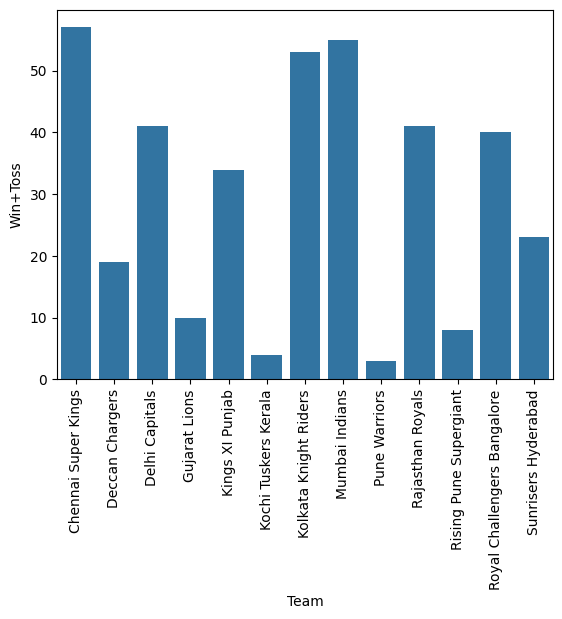

In [74]:
import matplotlib.pyplot as plt

ax = sns.barplot(x = 'Team', y = 'Win+Toss', data = df)
ax.set_xticklabels(df['Team'], rotation=90)
plt.show()

Plot the percentage of matches each team won after also winning the toss, out of their total matches. Rotate team names on the x-axis for better readability.

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_29133/1431903330.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Team'], rotation=90)


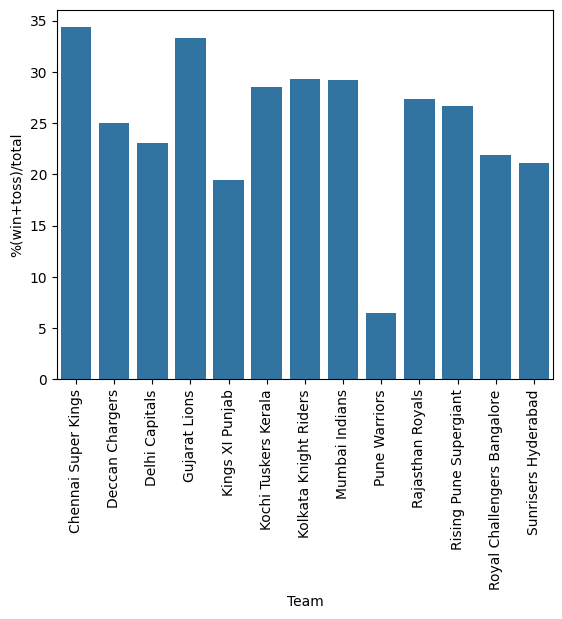

In [75]:
ax = sns.barplot(x = 'Team', y = '%(win+toss)/total', data=df)
ax.set_xticklabels(df['Team'], rotation=90)
plt.show()

find the maximum, which team has win the match and also win the toss

In [76]:
df[df['%(win+toss)/total']==df['%(win+toss)/total'].max()]

,Team,Win+Toss,Toss,%(win+toss),%toss,total_matches,%(win+toss)/total
0,Chennai Super Kings,57,89,64.044944,53.614458,166,34.337349


find the which team has won the number of matches and lost..

In [77]:
df['Win'] = df['Toss'] - df['Win+Toss']
df['Lost'] = df['total_matches'] - df['Win']

In [78]:
df.to_csv("team_info.csv")

#### Team which tops the chart is Chennai Super Kings

### **Question 3** 
* List the names of the **top 10 batsmen** by total runs accumulated across all the seasons
  * The output should be stored in a list

--------------------------



In [79]:
batting

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11541,Final (N),Chennai Super Kings,Rajasthan Royals,YK Pathan,run out (Raina),56.0,39.0,0.0,3.0,4.0,143.58,normal player,run out,no bowler,no fielder,0,2008-06-01
11542,Final (N),Chennai Super Kings,Rajasthan Royals,M Kaif,c Dhoni b Muralitharan,12.0,9.0,0.0,0.0,1.0,133.33,normal player,caught,Muralitharan,Dhoni,1,2008-06-01
11543,Final (N),Chennai Super Kings,Rajasthan Royals,RA Jadeja,c Kapugedera b Morkel,0.0,1.0,0.0,0.0,0.0,0.00,normal player,caught,Morkel,Kapugedera,1,2008-06-01
11544,Final (N),Chennai Super Kings,Rajasthan Royals,SK Warne,not out,9.0,9.0,0.0,1.0,0.0,100.00,captain,not out,no bowler,no fielder,0,2008-06-01


This line groups the batting DataFrame by the batsmen column and R indicates  the Batsmen runs..

In [80]:
batsmen = batting['R'].groupby(batting['batsmen']).sum()

In [81]:
batsman = batsmen.reset_index()

In [82]:
batsman.sort_values(['R'], axis=0, ascending=False, inplace=True)

#### Top 10 Batsman

In [83]:
batsman.head(10)

,batsmen,R
487,V Kohli,5412.0
424,SK Raina,5368.0
366,RG Sharma,4898.0
113,DA Warner,4706.0
393,S Dhawan,4579.0
95,CH Gayle,4484.0
292,MS Dhoni,4432.0
385,RV Uthappa,4411.0
24,AB de Villiers,4395.0
150,G Gambhir,4217.0


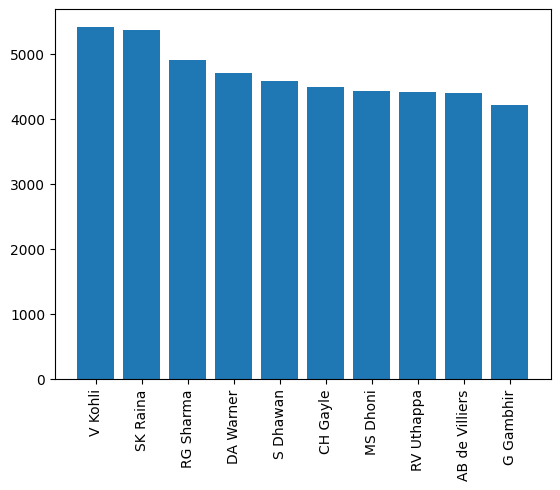

In [84]:

batsman.sort_values(['R'], axis=0, ascending=False, inplace=True)
top_10_batsman = batsman.head(10)
plt.bar(top_10_batsman['batsmen'], top_10_batsman['R'])
plt.xticks(rotation=90)
plt.show()

### **Question 4**
* Visualize the **runs made vs balls faced** in a jointplot. You should do this for all batsmen who batted in the **IPL season 2017**

--------------------

In [85]:
df = batting
dt = df.match_date
col = list()
for i in dt:
    i = str(i)
    temp = i.split('-')
    col.append(temp[0])
df['year'] = col

In [86]:
df.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,year
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18,2009
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18,2009
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18,2009
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18,2009
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18,2009


In [87]:
df = df[df['year']=='2017']
df.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,year
6962,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,c Mandeep Singh b Choudhary,14.0,8.0,10.0,2.0,1.0,175.00,captain,caught,Choudhary,Mandeep Singh,1,2017-04-05,2017
6963,1,Sunrisers Hyderabad,Royal Challengers Bangalore,S Dhawan,c Sachin Baby b Binny,40.0,31.0,51.0,5.0,0.0,129.03,normal player,caught,Binny,Sachin Baby,1,2017-04-05,2017
6964,1,Sunrisers Hyderabad,Royal Challengers Bangalore,MC Henriques,c Sachin Baby b Chahal,52.0,37.0,67.0,3.0,2.0,140.54,normal player,caught,Chahal,Sachin Baby,1,2017-04-05,2017
6965,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Yuvraj Singh,b Mills,62.0,27.0,49.0,7.0,3.0,229.62,normal player,bowled,Mills,no fielder,0,2017-04-05,2017
6966,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DJ Hooda,not out,16.0,12.0,29.0,0.0,1.0,133.33,normal player,not out,no bowler,no fielder,0,2017-04-05,2017


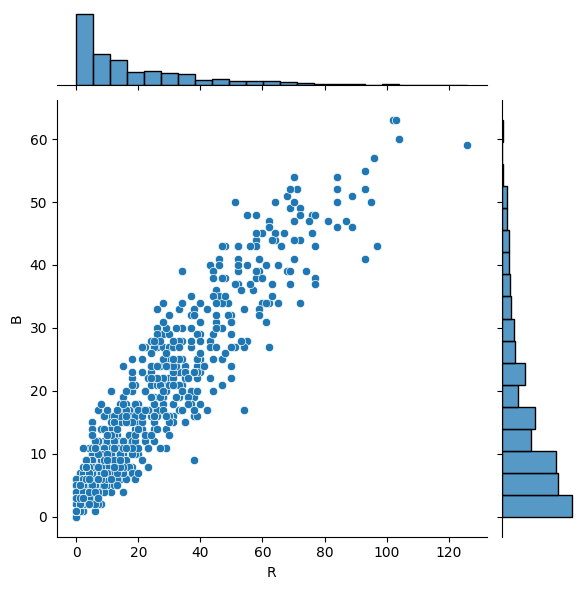

In [88]:
sns.jointplot(x='R',y='B',data=df)

### **Question 5**
* Create a new calculated column called **boundary_contribution**. It is calculated as : **(total runs made in 4s + 6s)/(total runs scored)**
* Create a scatter-plot between **boundary_contribution** and **strike_rate** where each dot represents an innings by a batsman
* Aggregate **boundary_contribution** by player and list down **top 10** players by boundary_contribution across all seasons
---------------------------------

In [89]:
batting['boundary_contribution'] = (batting['fours']+batting['sixes'])/batting['R']

In [90]:
batting.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,year,boundary_contribution
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18,2009,0.192308
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18,2009,0.118644
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18,2009,0.090909
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18,2009,0.111111
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18,2009,0.200000


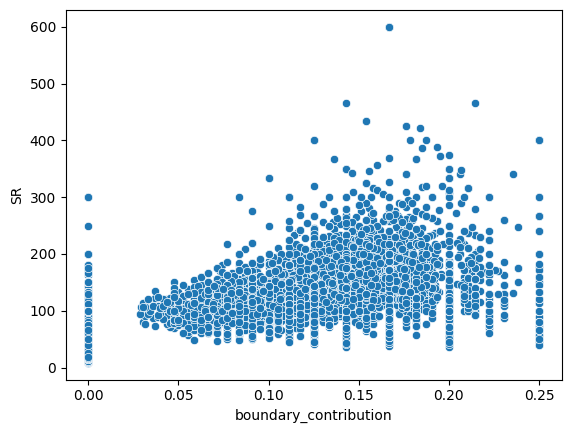

In [91]:
ax = sns.scatterplot(x="boundary_contribution", y="SR", data=batting)

* Aggregate **boundary_contribution** by player and list down **top 10** players by boundary_contribution across all seasons

In [92]:
boundary_contribution = batting['boundary_contribution'].groupby(batting['batsmen']).sum()

In [93]:
boundary_contribution = boundary_contribution.reset_index()

In [94]:
boundary_contribution.sort_values(['boundary_contribution'], axis=0, ascending=False, inplace=True)

In [95]:
boundary_contribution

,batsmen,boundary_contribution
424,SK Raina,20.137846
385,RV Uthappa,19.642338
393,S Dhawan,19.483546
487,V Kohli,18.559622
366,RG Sharma,18.349718
...,...,...
76,BB Sran,0.000000
73,BAW Mendis,0.000000
352,R Ninan,0.000000
67,B Laughlin,0.000000


In [96]:
boundary_contribution.head(10)

,batsmen,boundary_contribution
424,SK Raina,20.137846
385,RV Uthappa,19.642338
393,S Dhawan,19.483546
487,V Kohli,18.559622
366,RG Sharma,18.349718
95,CH Gayle,17.690974
150,G Gambhir,16.656673
442,SR Watson,16.126717
218,KD Karthik,16.010834
330,PA Patel,15.604900


#### Top 10 Batsmen by boundary contribution

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_29133/155911279.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(boundary_contribution['batsmen'], rotation=90)


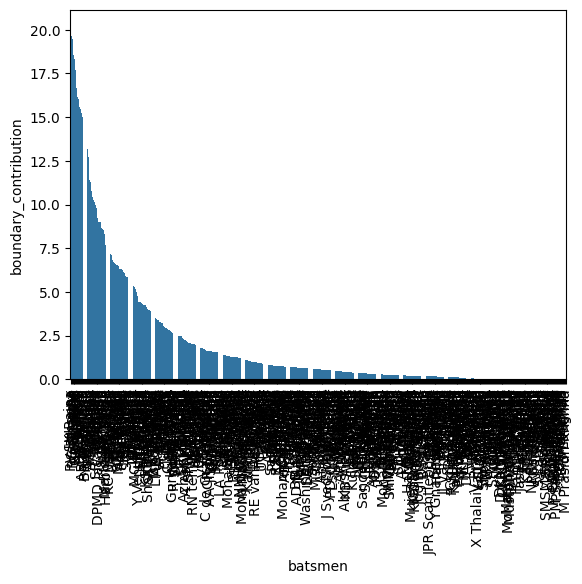

In [97]:
ax = sns.barplot(x = 'batsmen', y = 'boundary_contribution', data=boundary_contribution)
ax.set_xticklabels(boundary_contribution['batsmen'], rotation=90)
plt.show()

### **Question 6**
* List down **top 10** batsmen by **strike_rate** across all seasons. Plot the top 10 batsmen on a **bar chart**
* Repeat the above task for **bottom 10** batsmen
* Create a sub-plot with three sections. Show the below visuals in each : 
  * Box plot of **strike rates** of the top 10 batsmen listed in 1st part of the question
  * Box plot of **runs scored** of the top 10 batsmen
  * Box plot of **boundary_contribution** of the top 10 batsmen
----------------------------------

In [98]:
strike_rate = batting['SR'].groupby(batting['batsmen']).agg('sum')

In [99]:
strike_rate = strike_rate.reset_index()

In [100]:
strike_rate.sort_values(['SR'], axis=0, ascending=False, inplace=True)

In [101]:
df = strike_rate.head(10)

In [102]:
df

,batsmen,SR
424,SK Raina,22585.81
292,MS Dhoni,21878.36
366,RG Sharma,20495.90
385,RV Uthappa,20213.99
487,V Kohli,20030.77
511,YK Pathan,19226.20
218,KD Karthik,18979.84
24,AB de Villiers,18819.50
393,S Dhawan,17638.07
213,KA Pollard,17545.07


In [103]:
strikerates = strike_rate.head(10)

In [104]:
runs = strike_rate

#### Top 10 Batsmen by SR

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_29133/859194688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='batsmen', y='SR', data=df, palette=colors)
/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_29133/859194688.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['batsmen'], rotation=90)


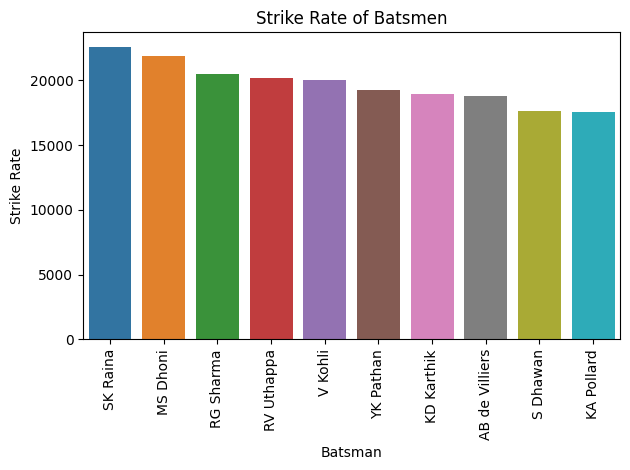

In [105]:
colors = sns.color_palette("tab10", n_colors=10)
ax = sns.barplot(x='batsmen', y='SR', data=df, palette=colors)
ax.set_xticklabels(df['batsmen'], rotation=90)
plt.title("Strike Rate of Batsmen")
plt.xlabel("Batsman")
plt.ylabel("Strike Rate")
plt.tight_layout()
plt.show()

In [106]:
df = strike_rate.head(10)

#### Bottom 10 Batsmen by SR

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_29133/4216574529.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = df['batsmen'], y = df['SR'], palette=colors)
/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_29133/4216574529.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['batsmen'], rotation=90)


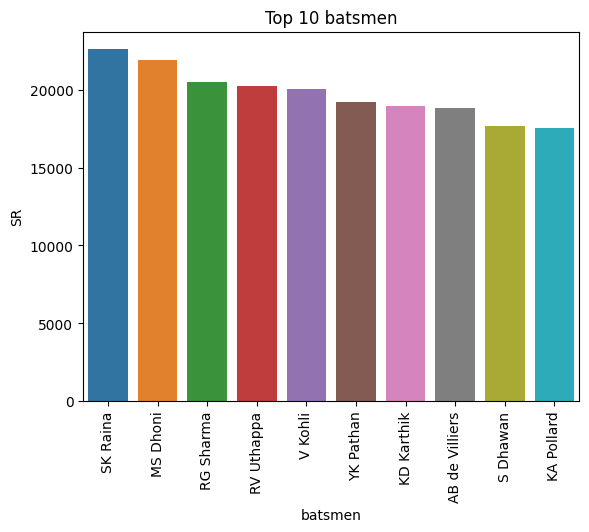

In [107]:
colors = sns.color_palette("tab10", n_colors=10)
ax = sns.barplot(x = df['batsmen'], y = df['SR'], palette=colors)
plt.title("Top 10 batsmen")
ax.set_xticklabels(df['batsmen'], rotation=90)
plt.show()

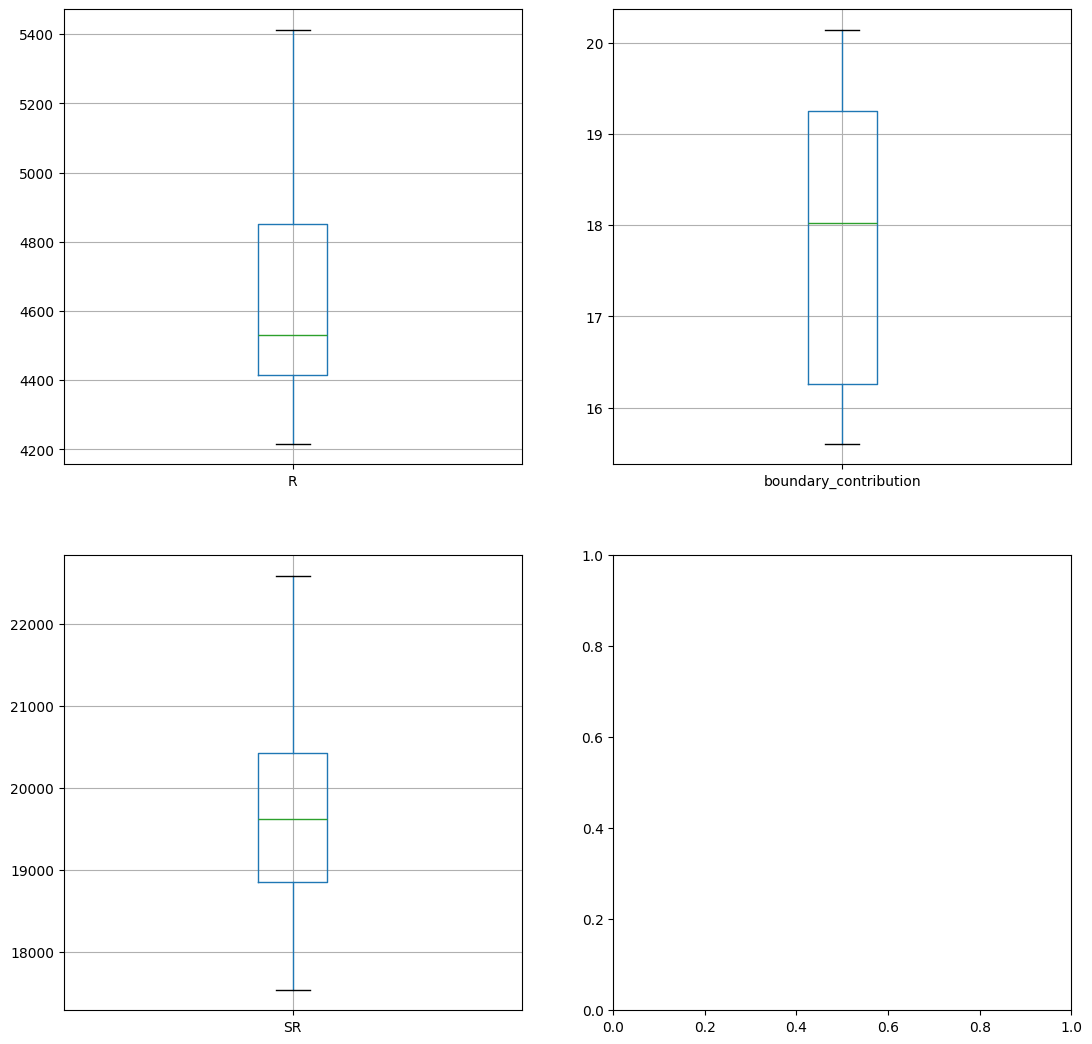

In [108]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13,13)) # create 2x2 array of subplots
batsman.head(10).boxplot(column='R', ax=axes[0,0])
strikerates.boxplot(column='SR',ax = axes[1,0])
boundary_contribution.head(10).boxplot(column='boundary_contribution',ax = axes[0,1])
plt.show()

### **Question 7**
* Create a new column called **dismissal_status**. Use the wicket_status column to extract values like **caught, lbw, bowled** etc. and store in dismissal_status column
* Extract the bowler name from the column **wicket_status** and store in a new column called **bowler_name**
* Extract fielder name from the **wicket_status** column and store in a new column called **fielder_name**
* Create a new column called **fielder_involved**. Set it to 1 if a fielder was involved in the dismissal else 0
* Create a **count plot** of player dismissals across the categories calculated above. Which category stands out from the rest?
------------------


In [109]:
batting['wicket_status'].unique()

array(['c Hayden b Thushara', 'not out', 'c Dhoni b Gony', ...,
       'c †Kamran Akmal b Pathan', 'run out (Ntini)',
       'c Dhoni b Muralitharan'], shape=(4593,), dtype=object)

In [110]:
wicket_status = []
for i in batting['wicket_status']:
    if 'lbw' in i:
        wicket_status.append('lbw')
    elif 'run out' in i:
        wicket_status.append('run out')
    elif 'not out' in i:
        wicket_status.append('not out')
    elif 'retired' in i:
        wicket_status.append('retires')
    elif 'hit wicket' in i:
        wicket_status.append('hit wicket')
    elif 'absent' in i:
        wicket_status.append('absent from match/ injured')
    elif 'st ' in temp:
        dismissal.append('stumped')
    elif 'obstructing' in i:
        wicket_status.append('obstructing')
    elif 'b' in i:
        if 'c' in i:
            wicket_status.append('caught and out')
        else:
            wicket_status.append('clean bold')

In [111]:
batting['dismissal_status'] = wicket_status

In [112]:
batting.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,year,boundary_contribution,dismissal_status
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18,2009,0.192308,caught and out
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18,2009,0.118644,not out
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18,2009,0.090909,caught and out
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18,2009,0.111111,caught and out
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18,2009,0.200000,caught and out


In [113]:
# batting[batting['dismissal_status']=='lbw']
# batting[batting['dismissal_status']=='run out']
# batting[batting['dismissal_status']=='hit wicket']

* Extract the bowler name from the column **wicket_status** and store in a new column called **bowler_name**

In [114]:
batting['bowler_name'] = batting['wicket_status'].str.extract(r'\b(b|by)\s+([A-Za-z\s]+)', expand=False)[1]
print(batting[['wicket_status', 'bowler_name']].head())

                wicket_status      bowler_name
0         c Hayden b Thushara         Thushara
1                     not out              NaN
2              c Dhoni b Gony             Gony
3                  c & b Gony             Gony
4  c Hayden b Joginder Sharma  Joginder Sharma


* Extract fielder name from the **wicket_status** column and store in a new column called **fielder_name**

In [115]:
batting['fielder_name'] = batting['wicket_status'].str.extract(r'^(?:c|st)\s+([A-Za-z\s]+?)\s+b', expand=False)
print(batting[['wicket_status', 'fielder_name']].head())

                wicket_status fielder_name
0         c Hayden b Thushara       Hayden
1                     not out          NaN
2              c Dhoni b Gony        Dhoni
3                  c & b Gony          NaN
4  c Hayden b Joginder Sharma       Hayden


* Create a new column called **fielder_involved**. Set it to 1 if a fielder was involved in the dismissal else 0

In [116]:
dismissal_mode = batting['dismissal_mode']
dismissal_mode[2]

'caught'

In [117]:
batting['fielder_involved'] = batting['wicket_status'].apply(
    lambda x: 0 if any(keyword in x for keyword in batting['dismissal_mode']) else 1
)

# Print the result
print(batting[['wicket_status', 'fielder_involved']].head())

                wicket_status  fielder_involved
0         c Hayden b Thushara                 1
1                     not out                 0
2              c Dhoni b Gony                 1
3                  c & b Gony                 1
4  c Hayden b Joginder Sharma                 1


In [118]:
batting.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,year,boundary_contribution,dismissal_status,fielder_name,fielder_involved
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18,2009,0.192308,caught and out,Hayden,1
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,NaN,no fielder,0,2009-04-18,2009,0.118644,not out,NaN,0
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18,2009,0.090909,caught and out,Dhoni,1
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18,2009,0.111111,caught and out,NaN,1
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18,2009,0.200000,caught and out,Hayden,1


In [119]:
print(batting.columns.tolist())

['match_no', 'team_1', 'team_2', 'batsmen', 'wicket_status', 'R', 'B', 'M', 'fours', 'sixes', 'SR', 'special_role', 'dismissal_mode', 'bowler_name', 'fielder', 'is_fielder_involved', 'match_date', 'year', 'boundary_contribution', 'dismissal_status', 'fielder_name', 'fielder_involved']


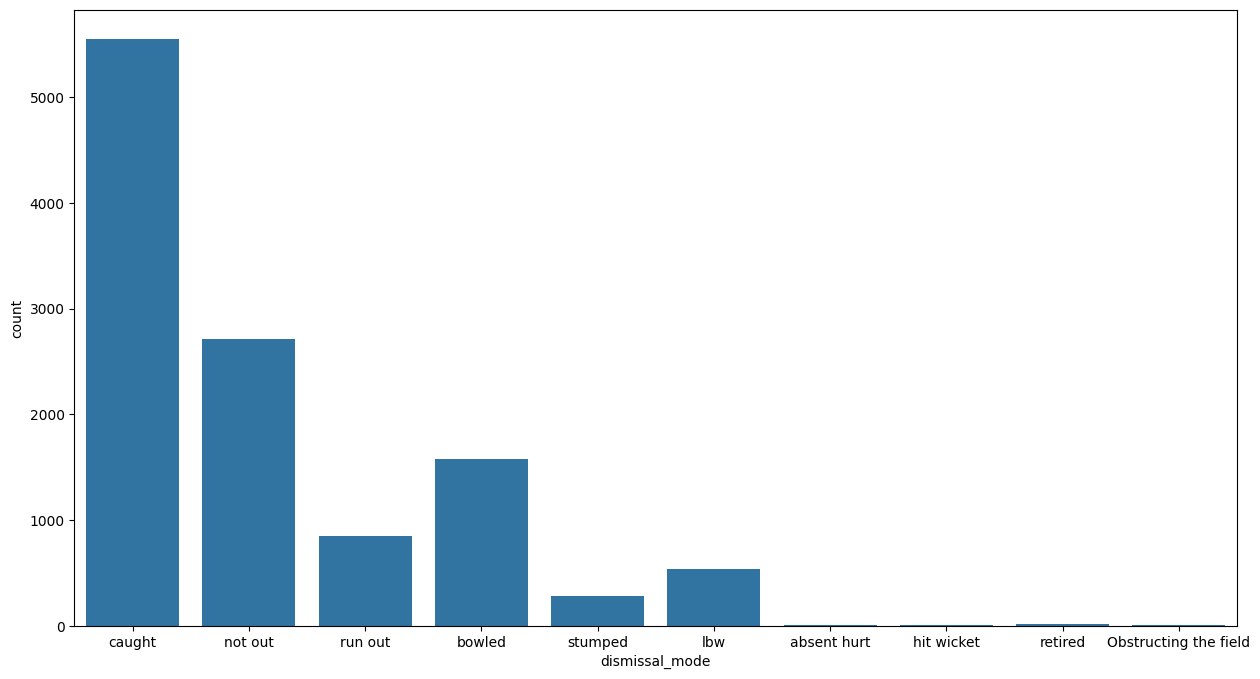

In [120]:
ax = sns.countplot(x="dismissal_mode", data=batting)
ax.figure.set_size_inches(15,8)

### **Question 8**
* Create a dataframe at a player level. Calculate below mentioned metrics :
  * #50s
  * #100s
  * #4s
  * #6s
  * Average




In [121]:
batting['dismissed'] = ~batting['wicket_status'].str.lower().str.contains('not out')

In [122]:
batting

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,year,boundary_contribution,dismissal_status,fielder_name,fielder_involved,dismissed
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18,2009,0.192308,caught and out,Hayden,1,True
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,NaN,no fielder,0,2009-04-18,2009,0.118644,not out,NaN,0,False
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18,2009,0.090909,caught and out,Dhoni,1,True
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18,2009,0.111111,caught and out,NaN,1,True
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18,2009,0.200000,caught and out,Hayden,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11541,Final (N),Chennai Super Kings,Rajasthan Royals,YK Pathan,run out (Raina),56.0,39.0,0.0,3.0,4.0,143.58,normal player,run out,NaN,no fielder,0,2008-06-01,2008,0.125000,run out,NaN,0,True
11542,Final (N),Chennai Super Kings,Rajasthan Royals,M Kaif,c Dhoni b Muralitharan,12.0,9.0,0.0,0.0,1.0,133.33,normal player,caught,Muralitharan,Dhoni,1,2008-06-01,2008,0.083333,caught and out,Dhoni,1,True
11543,Final (N),Chennai Super Kings,Rajasthan Royals,RA Jadeja,c Kapugedera b Morkel,0.0,1.0,0.0,0.0,0.0,0.00,normal player,caught,Morkel,Kapugedera,1,2008-06-01,2008,NaN,caught and out,Kapugedera,1,True
11544,Final (N),Chennai Super Kings,Rajasthan Royals,SK Warne,not out,9.0,9.0,0.0,1.0,0.0,100.00,captain,not out,NaN,no fielder,0,2008-06-01,2008,0.111111,not out,NaN,0,False


In [133]:
# 1. Mark 100s
batting['100s'] = batting['R'].apply(lambda x: 1 if x >= 100 else 0).astype(int)

# 2. Mark 50s (exclude 100s)
batting['50s'] = batting['R'].apply(lambda x: 1 if 50 <= x < 100 else 0).astype(int)

In [124]:
print(batting.columns.tolist())

['match_no', 'team_1', 'team_2', 'batsmen', 'wicket_status', 'R', 'B', 'M', 'fours', 'sixes', 'SR', 'special_role', 'dismissal_mode', 'bowler_name', 'fielder', 'is_fielder_involved', 'match_date', 'year', 'boundary_contribution', 'dismissal_status', 'fielder_name', 'fielder_involved', 'dismissed', '100s', '50s']


In [125]:
player_level = batting.groupby('batsmen').agg({
    '100s': 'sum',
    '50s': 'sum',
    'fours': 'sum',   
    'sixes': 'sum',  
    'R': 'sum',
    'dismissed': 'sum'
}).reset_index()

In [126]:
player_level

,batsmen,100s,50s,fours,sixes,R,dismissed
0,A Ashish Reddy,0,0,17.0,14.0,280.0,15
1,A Chandila,0,0,0.0,0.0,4.0,0
2,A Chopra,0,0,7.0,0.0,53.0,6
3,A Choudhary,0,0,1.0,1.0,25.0,1
4,A Dananjaya,0,0,0.0,0.0,4.0,0
...,...,...,...,...,...,...,...
513,YV Takawale,0,0,26.0,3.0,192.0,8
514,Yashpal Singh,0,0,5.0,0.0,47.0,4
515,Younis Khan,0,0,0.0,0.0,3.0,1
516,Yuvraj Singh,0,13,217.0,149.0,2750.0,111


In [135]:
# average
player_level['average'] = (player_level['R'] / player_level['dismissed']).round(2)


In [136]:
player_level

,batsmen,100s,50s,fours,sixes,R,dismissed,average
0,A Ashish Reddy,0,0,17.0,14.0,280.0,15,18.67
1,A Chandila,0,0,0.0,0.0,4.0,0,inf
2,A Chopra,0,0,7.0,0.0,53.0,6,8.83
3,A Choudhary,0,0,1.0,1.0,25.0,1,25.00
4,A Dananjaya,0,0,0.0,0.0,4.0,0,inf
...,...,...,...,...,...,...,...,...
513,YV Takawale,0,0,26.0,3.0,192.0,8,24.00
514,Yashpal Singh,0,0,5.0,0.0,47.0,4,11.75
515,Younis Khan,0,0,0.0,0.0,3.0,1,3.00
516,Yuvraj Singh,0,13,217.0,149.0,2750.0,111,24.77


In [127]:
# hundred = batting.groupby('batsmen')

In [128]:
batting['100s'] = ((batting['R'])/100)
batting['100s'] = batting['100s'].apply(np.floor)
batting['50s'] = ((batting['R']/50) - 2*(batting['100s']))
batting['50s'] = batting['50s'].apply(np.floor)

In [129]:
runs = batting.groupby(batting['batsmen']).sum()
# runs.reset_index()

In [130]:
player_level

,batsmen,100s,50s,fours,sixes,R,dismissed
0,A Ashish Reddy,0,0,17.0,14.0,280.0,15
1,A Chandila,0,0,0.0,0.0,4.0,0
2,A Chopra,0,0,7.0,0.0,53.0,6
3,A Choudhary,0,0,1.0,1.0,25.0,1
4,A Dananjaya,0,0,0.0,0.0,4.0,0
...,...,...,...,...,...,...,...
513,YV Takawale,0,0,26.0,3.0,192.0,8
514,Yashpal Singh,0,0,5.0,0.0,47.0,4
515,Younis Khan,0,0,0.0,0.0,3.0,1
516,Yuvraj Singh,0,13,217.0,149.0,2750.0,111


* Assign below points to the players based on the above metrics and calculate the total points earned : 
  * 1 half century = **5 points**
  * 1 century = **10 points**
  * 1 four = **2 point**
  * 1 six = **4 points**
  * Average > 30 = **20 points**
  * Average < 30 = **10 points**

* Rank the players based on total points earned. Now list down the top 10 batsmen overall across all IPL seasons
------------------

In [154]:

player_level['average'] = player_level['average'].replace([np.inf, -np.inf], np.nan)


player_level['points'] = (
    player_level['50s'] * 5 +
    player_level['100s'] * 10 +
    player_level['fours'] * 2 +
    player_level['sixes'] * 4
)
player_level['points'] += np.where(player_level['average'] > 30, 20, 10)

player_level['rank'] = player_level['points'].rank(ascending=False, method='min')

top_players = player_level.sort_values(by='points', ascending=False)

top_10_batsmen = top_players[['batsmen', '100s', '50s', 'fours', 'sixes', 'average', 'points', 'rank']].head(10)

print(top_10_batsmen)
# Rank and get top 10

            batsmen  100s  50s  fours  sixes  average  points  rank
95         CH Gayle     6   28  368.0  326.0    41.14  2260.0   1.0
424        SK Raina     1   38  493.0  194.0    33.34  1982.0   2.0
487         V Kohli     5   36  480.0  190.0    37.85  1970.0   3.0
113       DA Warner     4   44  458.0  181.0    43.17  1920.0   4.0
366       RG Sharma     1   36  431.0  194.0    31.60  1848.0   5.0
24   AB de Villiers     3   33  357.0  212.0    39.95  1777.0   6.0
393        S Dhawan     0   37  524.0   96.0    33.18  1637.0   7.0
385      RV Uthappa     0   24  435.0  156.0    28.83  1624.0   8.0
292        MS Dhoni     0   23  297.0  209.0    42.21  1565.0   9.0
442       SR Watson     4   19  343.0  177.0    31.09  1549.0  10.0


In [155]:
# rename the columns
player_level = player_level.rename(columns={'4s': 'fours', '6s': 'sixes'})

In [156]:
player_level

,batsmen,100s,50s,fours,sixes,R,dismissed,average,points,rank
0,A Ashish Reddy,0,0,17.0,14.0,280.0,15,18.67,100.0,145.0
1,A Chandila,0,0,0.0,0.0,4.0,0,NaN,10.0,423.0
2,A Chopra,0,0,7.0,0.0,53.0,6,8.83,24.0,286.0
3,A Choudhary,0,0,1.0,1.0,25.0,1,25.00,16.0,338.0
4,A Dananjaya,0,0,0.0,0.0,4.0,0,NaN,10.0,423.0
...,...,...,...,...,...,...,...,...,...,...
513,YV Takawale,0,0,26.0,3.0,192.0,8,24.00,74.0,165.0
514,Yashpal Singh,0,0,5.0,0.0,47.0,4,11.75,20.0,308.0
515,Younis Khan,0,0,0.0,0.0,3.0,1,3.00,10.0,423.0
516,Yuvraj Singh,0,13,217.0,149.0,2750.0,111,24.77,1105.0,19.0


In [157]:
times_played = (batting['batsmen'].groupby(batting['batsmen']).agg('count'))

In [158]:
batting['times_played'] = times_played
runs['times_played'] = times_played

In [159]:
average = runs['R']/times_played
# average

In [160]:
runs['average'] = average
runs = runs.reset_index()

In [161]:
runs['points'] = runs['fours']*2 + runs['sixes']*4 + runs['50s']*5 + runs['100s']*10
# runs

In [162]:
runs.loc[runs['average'] <= 30, 'points'] = runs['points']+10
runs.loc[runs['average'] > 30, 'points'] = runs['points']+20

In [163]:
runs.head()
some_data = runs

In [164]:
runs = runs.sort_values("points",ascending=False)

In [165]:
runs.head()

,batsmen,match_no,team_1,team_2,wicket_status,R,fours,sixes,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,year,dismissal_status,fielder_name,dismissed,100s,50s,times_played,average,points
95,CH Gayle,4th match (D/N)6th match10th match (D/N)17th m...,Kolkata Knight RidersKings XI PunjabRajasthan ...,Deccan ChargersKolkata Knight RidersKolkata Kn...,c Harmeet Singh b Singhnot outc Jadeja b Warne...,4484.0,368.0,326.0,normal playernormal playernormal playernormal ...,caughtnot outcaughtcaughtcaughtbowledcaughtnot...,SinghWarneBravoAppannaKhanAbdullaHopesSharmaCh...,Harmeet Singhno fielderJadejaTendulkarGoswamin...,79,2009-04-192009-04-212009-04-232009-04-272009-0...,2009200920092009200920092009201120112011201120...,caught and outnot outcaught and outcaught and ...,Harmeet SinghJadejaTendulkarGoswamiYuvraj Sing...,109,6.0,29.0,124,36.161290,2265.0
424,SK Raina,15th match (D/N)9th match16th match22nd match ...,Mumbai IndiansChennai Super KingsDelhi Daredev...,Chennai Super KingsRoyal Challengers Bangalore...,c Raje b Bravoc Kohli b Kumarc de Villiers b S...,5368.0,493.0,194.0,normal playernormal playernormal playernormal ...,caughtcaughtcaughtcaughtcaughtcaughtcaughtcaug...,BravoKumarSangwanSharmaPatelBhatiaSinghChawlaS...,RajeKohlide VilliersSharmaSmithDilshanSmithGoe...,126,2009-04-182009-04-202009-04-232009-04-272009-0...,2009200920092009200920092009200920092009200920...,caught and outcaught and outcaught and outcaug...,RajeKohlide VilliersSmithDilshanSmithGoelCarse...,161,1.0,38.0,189,28.402116,1972.0
487,V Kohli,2nd match (D/N)5th match (D/N)8th match (D/N)1...,Royal Challengers BangaloreChennai Super Kings...,Rajasthan RoyalsRoyal Challengers BangaloreRoy...,b Warnec Badrinath b Joginder Sharmac Gibbs b ...,5412.0,480.0,190.0,normal playernormal playernormal playernormal ...,bowledcaughtcaughtcaughtcaughtcaughtcaughtcaug...,WarneJoginder SharmaSinghSinghNehraHodgePathan...,no fielderBadrinathGibbsBoparaDilshan†van WykC...,100,2009-04-182009-04-202009-04-222009-04-242009-0...,2009200920092009200920092009200920092009200920...,clean boldcaught and outcaught and outcaught a...,BadrinathGibbsBoparaDilshanChawlaMorkelDuminyO...,143,5.0,36.0,169,32.023669,1970.0
113,DA Warner,26th match (D/N)3135th match (D/N)39th match (...,Chennai Super KingsKolkata Knight RidersMumbai...,Delhi DaredevilsDelhi DaredevilsDelhi Daredevi...,st †Dhoni b Jakatic Henriques b Agarkarst †Sha...,4706.0,458.0,181.0,normal playernormal playernormal playernormal ...,stumpedcaughtstumpedcaughtcaughtcaughtcaughtbo...,JakatiAgarkarDuminySharmaVaasKulkarniHarrisMal...,†DhoniHenriques†Shah†van WykVenugopal RaoMoham...,75,2009-05-022009-05-052009-05-082009-05-102009-0...,2009200920092009200920092009201120112011201120...,clean boldcaught and outclean boldcaught and o...,HenriquesVenugopal RaoMohammad AshrafulGibbsRa...,109,4.0,44.0,126,37.349206,1920.0
366,RG Sharma,4th match (D/N)8th match (D/N)12th match16th m...,Kolkata Knight RidersDeccan ChargersDeccan Cha...,Deccan ChargersRoyal Challengers BangaloreMumb...,not outc Pietersen b Steync Dhawan b Bravoc †D...,4898.0,431.0,194.0,normal playernormal playernormal playernormal ...,not outcaughtcaughtcaughtcaughtcaughtcaughtcau...,SteynBravoBalajiMishraTrivediJakatiMalingaLeeJ...,no fielderPietersenDhawan†DhoniManhasWarneBadr...,112,2009-04-192009-04-222009-04-252009-04-272009-0...,2009200920092009200920092009200920092009200920...,not outcaught and outcaught and outcaught and ...,PietersenDhawanManhasWarneBadrinathBravoWarner...,155,1.0,36.0,183,26.765027,1838.0


In [166]:
runs['Rank'] = np.arange(1, len(runs) + 1)

In [167]:
runs.head(10)

,batsmen,match_no,team_1,team_2,wicket_status,R,fours,sixes,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,year,dismissal_status,fielder_name,dismissed,100s,50s,times_played,average,points,Rank
95,CH Gayle,4th match (D/N)6th match10th match (D/N)17th m...,Kolkata Knight RidersKings XI PunjabRajasthan ...,Deccan ChargersKolkata Knight RidersKolkata Kn...,c Harmeet Singh b Singhnot outc Jadeja b Warne...,4484.0,368.0,326.0,normal playernormal playernormal playernormal ...,caughtnot outcaughtcaughtcaughtbowledcaughtnot...,SinghWarneBravoAppannaKhanAbdullaHopesSharmaCh...,Harmeet Singhno fielderJadejaTendulkarGoswamin...,79,2009-04-192009-04-212009-04-232009-04-272009-0...,2009200920092009200920092009201120112011201120...,caught and outnot outcaught and outcaught and ...,Harmeet SinghJadejaTendulkarGoswamiYuvraj Sing...,109,6.0,29.0,124,36.161290,2265.0,1
424,SK Raina,15th match (D/N)9th match16th match22nd match ...,Mumbai IndiansChennai Super KingsDelhi Daredev...,Chennai Super KingsRoyal Challengers Bangalore...,c Raje b Bravoc Kohli b Kumarc de Villiers b S...,5368.0,493.0,194.0,normal playernormal playernormal playernormal ...,caughtcaughtcaughtcaughtcaughtcaughtcaughtcaug...,BravoKumarSangwanSharmaPatelBhatiaSinghChawlaS...,RajeKohlide VilliersSharmaSmithDilshanSmithGoe...,126,2009-04-182009-04-202009-04-232009-04-272009-0...,2009200920092009200920092009200920092009200920...,caught and outcaught and outcaught and outcaug...,RajeKohlide VilliersSmithDilshanSmithGoelCarse...,161,1.0,38.0,189,28.402116,1972.0,2
487,V Kohli,2nd match (D/N)5th match (D/N)8th match (D/N)1...,Royal Challengers BangaloreChennai Super Kings...,Rajasthan RoyalsRoyal Challengers BangaloreRoy...,b Warnec Badrinath b Joginder Sharmac Gibbs b ...,5412.0,480.0,190.0,normal playernormal playernormal playernormal ...,bowledcaughtcaughtcaughtcaughtcaughtcaughtcaug...,WarneJoginder SharmaSinghSinghNehraHodgePathan...,no fielderBadrinathGibbsBoparaDilshan†van WykC...,100,2009-04-182009-04-202009-04-222009-04-242009-0...,2009200920092009200920092009200920092009200920...,clean boldcaught and outcaught and outcaught a...,BadrinathGibbsBoparaDilshanChawlaMorkelDuminyO...,143,5.0,36.0,169,32.023669,1970.0,3
113,DA Warner,26th match (D/N)3135th match (D/N)39th match (...,Chennai Super KingsKolkata Knight RidersMumbai...,Delhi DaredevilsDelhi DaredevilsDelhi Daredevi...,st †Dhoni b Jakatic Henriques b Agarkarst †Sha...,4706.0,458.0,181.0,normal playernormal playernormal playernormal ...,stumpedcaughtstumpedcaughtcaughtcaughtcaughtbo...,JakatiAgarkarDuminySharmaVaasKulkarniHarrisMal...,†DhoniHenriques†Shah†van WykVenugopal RaoMoham...,75,2009-05-022009-05-052009-05-082009-05-102009-0...,2009200920092009200920092009201120112011201120...,clean boldcaught and outclean boldcaught and o...,HenriquesVenugopal RaoMohammad AshrafulGibbsRa...,109,4.0,44.0,126,37.349206,1920.0,4
366,RG Sharma,4th match (D/N)8th match (D/N)12th match16th m...,Kolkata Knight RidersDeccan ChargersDeccan Cha...,Deccan ChargersRoyal Challengers BangaloreMumb...,not outc Pietersen b Steync Dhawan b Bravoc †D...,4898.0,431.0,194.0,normal playernormal playernormal playernormal ...,not outcaughtcaughtcaughtcaughtcaughtcaughtcau...,SteynBravoBalajiMishraTrivediJakatiMalingaLeeJ...,no fielderPietersenDhawan†DhoniManhasWarneBadr...,112,2009-04-192009-04-222009-04-252009-04-272009-0...,2009200920092009200920092009200920092009200920...,not outcaught and outcaught and outcaught and ...,PietersenDhawanManhasWarneBadrinathBravoWarner...,155,1.0,36.0,183,26.765027,1838.0,5
24,AB de Villiers,9th match14th match18th match (D/N)2126th matc...,Delhi DaredevilsRoyal Challengers BangaloreDel...,Chennai Super KingsDelhi DaredevilsRajasthan R...,not outb Appannalbw b Warnec Ojha b Shoaib Ahm...,4395.0,357.0,212.0,normal playernormal playernormal playernormal ...,not outbowledlbwcaughtbowlednot outnot outcaug...,AppannaWarneShoaib AhmedTyagiSmithSreesanthvan...,no fielderno fielderno fielde

### **Question 9**
* Look for a column called **Special_role** to denote if a player is captain or not. 
* **Filter** the dataframe based on if a player is a captain.
* Pick all the innings by the captains (For **IPL 2017**) and plot a **box and whiskers plot** of **%run_contribution** per captain
  * Which captain do you think has played **captain's knock** most of the times? (purely going by % contribution to scorecard for now)
------------------


In [168]:
batting

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,year,boundary_contribution,dismissal_status,fielder_name,fielder_involved,dismissed,100s,50s,times_played
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18,2009,0.192308,caught and out,Hayden,1,True,0,0,NaN
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,NaN,no fielder,0,2009-04-18,2009,0.118644,not out,NaN,0,False,0,1,NaN
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18,2009,0.090909,caught and out,Dhoni,1,True,0,0,NaN
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18,2009,0.111111,caught and out,NaN,1,True,0,0,NaN
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18,2009,0.200000,caught and out,Hayden,1,True,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11541,Final (N),Chennai Super Kings,Rajasthan Royals,YK Pathan,run out (Raina),56.0,39.0,0.0,3.0,4.0,143.58,normal player,run out,NaN,no fielder,0,2008-06-01,2008,0.125000,run out,NaN,0,True,0,1,NaN
11542,Final (N),Chennai Super Kings,Rajasthan Royals,M Kaif,c Dhoni b Muralitharan,12.0,9.0,0.0,0.0,1.0,133.33,normal player,caught,Muralitharan,Dhoni,1,2008-06-01,2008,0.083333,caught and out,Dhoni,1,True,0,0,NaN
11543,Final (N),Chennai Super Kings,Rajasthan Royals,RA Jadeja,c Kapugedera b Morkel,0.0,1.0,0.0,0.0,0.0,0.00,normal player,caught,Morkel,Kapugedera,1,2008-06-01,2008,NaN,caught and out,Kapugedera,1,True,0,0,NaN
11544,Final (N),Chennai Super Kings,Rajasthan Royals,SK Warne,not out,9.0,9.0,0.0,1.0,0.0,100.00,captain,not out,NaN,no fielder,0,2008-06-01,2008,0.111111,not out,NaN,0,False,0,0,NaN


In [ ]:
# captain = batting[batting['special_role'].str.contains('captain',na=False)]
# captain['year'].unique()

array(['2009', '2011', '2012', '2013', '2014', '', '2015', '2016', '2017',
       '2018', '2019', '2010', '2008'], dtype=object)

filter data for captains year==2017

In [190]:
captain_ipl_2017 = batting[batting['special_role'].str.contains('captain', na=False) & (batting['year'] == 2017)]

In [ ]:
# calculate the team total runs per match
team_runs = captain_ipl_2017.groupby('match_no')['R'].transform('sum')


In [186]:
# calculate %run_contribution for each captain
captain_ipl_2017['%run_contribution'] = (captain_ipl_2017['R'] / team_runs) * 100


In [ ]:
#  Plot the Box and Whiskers plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='batsmen', y='%run_contribution', data=captain_ipl_2017)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Box and Whiskers Plot of %run_contribution per Captain (IPL 2017)")
plt.show()

### **Question 10**
* Is IPL more in favor of batsmen?
* Let's consider two metrics **total_runs** made in a match and the **run_rate** of the match
* Create a **histogram** of **total_runs** by match. What kind of a **distribution** your discover?
* **Repeat** the above step for **run_rate** per match too
* Is the distribution **left skewed** or **right skewed**?
* Discuss your insights

------------------

In [ ]:
balls = deliveries.groupby(deliveries['Match_id']).agg('count')
balls = balls.reset_index()

In [ ]:
runs = deliveries.groupby(deliveries['Match_id']).sum()
runs= runs.reset_index()

In [ ]:
histogram = pd.DataFrame(balls.Match_id)

In [ ]:
histogram['runs'] = runs['Runs_total']
histogram['over'] = balls['Over']/6

In [ ]:
histogram['run_rate'] = histogram['runs'] / histogram['over']

In [ ]:
histogram.head()

,Match_id,runs,over,run_rate
0,2008041801,222,20.666667,10.741935
1,2008041802,82,16.833333,4.871287
2,2008041901,369,41.000000,9.000000
3,2008041902,339,36.833333,9.203620
4,2008042001,275,40.166667,6.846473


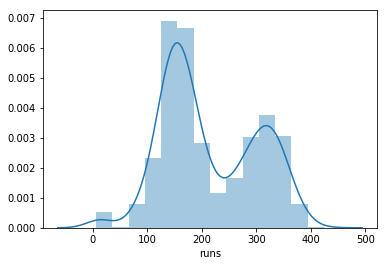

In [ ]:
sns.distplot(histogram['runs'])

In [ ]:
from scipy.stats import skew
print (skew(histogram['runs']))

## Histogram is rightly skewed

0.2703294683469671


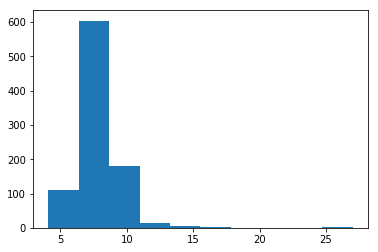

In [ ]:
plt.hist(histogram['run_rate'])
plt.show()

#### Rightly Skewed

### **Question 11**
* **Filter** the histogram (created in **Question 9**) for an **IPL season**. Ex. IPL 2016
* Also, filter the histogram for a **team** within a **season**. Ex. for CSK within IPL 2016
* **Describe** your observations. Think along the following **questions** : 
  * What is the meaning of **skewness**?
  * Is there an **observable difference** between the **rate of runs** scored for some teams over others?
    * Choose appropriate **visualization** to understand **run_rate** of teams (**Hint :** Violin charts)
    * Which teams are strong at making **large quantity** of runs?
    * Which teams are strong at making runs at a **quicker rate**? (Consider run a ball the **base line** for **under** or **over** indexing teams)

* **Note :** *A metric is said to be under-indexed when it's value is less than the baseline value. Similarly it is said to be over-indexed when it's value is more than the baseline value*

-------------------------
    

In [ ]:
season_2016 = histogram[histogram['Match_id'].astype(str).str.contains('2016')]

In [ ]:
season_2016['runs'].max()

385

In [ ]:
type(season_2016['Match_id'].to_numpy()[0])

numpy.int64

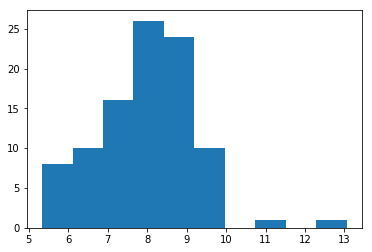

In [ ]:
plt.hist(season_2016['run_rate'])
plt.show()

In [ ]:
matches.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,match_key
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,2008041801
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,2008041901
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,2008041902
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,2008042001
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,2008042002


In [ ]:
matches['Team 1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [ ]:
bangalore_2016 = matches[(matches['Team 1'] == 'Royal Challengers Bangalore') |( matches['Team 2'] == 'Royal Challengers Bangalore')]

In [ ]:
bangalore_2016 = bangalore_2016[bangalore_2016['year']==2016]
bangalore_2016.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,match_key
526,2016-04-12,Bengaluru,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,2016,4,12,Runs,45.0,Sunrisers Hyderabad,field first,527,2016041201
533,2016-04-17,Bengaluru,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,2016,4,17,Wickets,7.0,Delhi Capitals,field first,534,2016041702
536,2016-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,2016,4,20,Wickets,6.0,Mumbai Indians,field first,537,2016042001
538,2016-04-22,Pune,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,2016,4,22,Runs,13.0,Rising Pune Supergiant,field first,539,2016042201
541,2016-04-24,Rajkot,Gujarat Lions,Royal Challengers Bangalore,Gujarat Lions,2016,4,24,Wickets,6.0,Royal Challengers Bangalore,bat first,542,2016042401


In [ ]:
bangalore_key = bangalore_2016['match_key'].to_numpy()
bangalore_key

array(['2016041201', '2016041702', '2016042001', '2016042201',
       '2016042401', '2016043002', '2016050201', '2016050701',
       '2016050901', '2016051101', '2016051401', '2016051601',
       '2016051801', '2016052202', '2016052401', '2016052901'],
      dtype=object)

In [ ]:
run_rate = []
runs = []
for j in bangalore_key:
    if j in str(season_2016['Match_id'].to_numpy()):
        run_rate.append(season_2016[season_2016['Match_id'].astype(str)==j]['run_rate'].to_numpy()[0])
        runs.append(season_2016[season_2016['Match_id'].astype(str)==j]['runs'].to_numpy()[0])

In [ ]:
bangalore_2016['runs'] = runs
bangalore_2016['run_rate'] = run_rate

In [ ]:
bangalore_2016.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,match_key,runs,run_rate
526,2016-04-12,Bengaluru,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,2016,4,12,Runs,45.0,Sunrisers Hyderabad,field first,527,2016041201,227,10.896000
533,2016-04-17,Bengaluru,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,2016,4,17,Wickets,7.0,Delhi Capitals,field first,534,2016041702,345,8.771186
536,2016-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,2016,4,20,Wickets,6.0,Mumbai Indians,field first,537,2016042001,170,8.095238
538,2016-04-22,Pune,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,2016,4,22,Runs,13.0,Rising Pune Supergiant,field first,539,2016042201,185,8.671875
541,2016-04-24,Rajkot,Gujarat Lions,Royal Challengers Bangalore,Gujarat Lions,2016,4,24,Wickets,6.0,Royal Challengers Bangalore,bat first,542,2016042401,340,8.429752


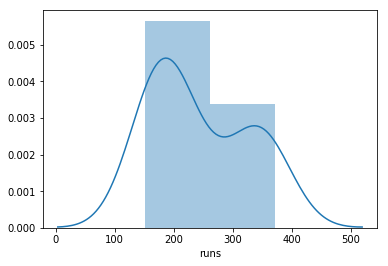

In [ ]:
sns.distplot(bangalore_2016['runs'])

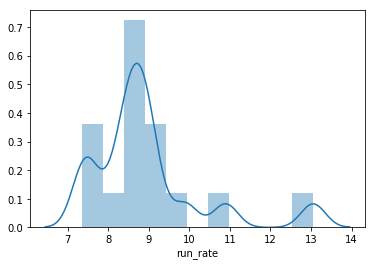

In [ ]:
sns.distplot(bangalore_2016['run_rate'])

In [ ]:
matches_2016 = matches[matches['year']==2016]
# matches_2016

In [ ]:
teams = matches_2016['Team 1'].unique()

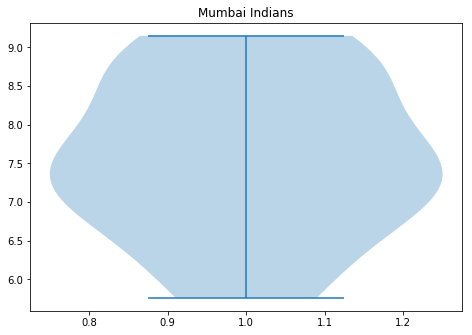

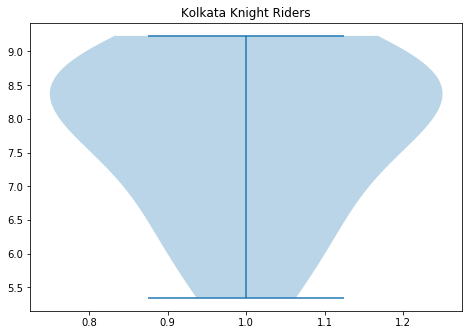

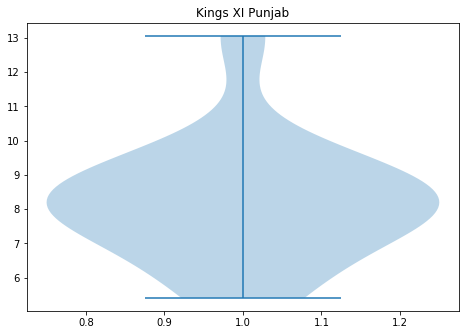

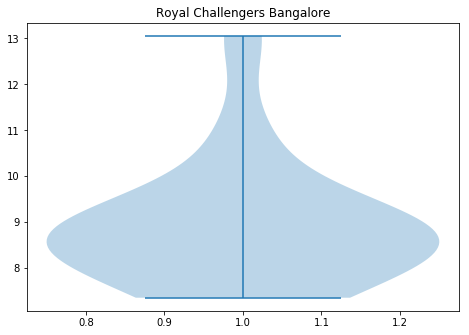

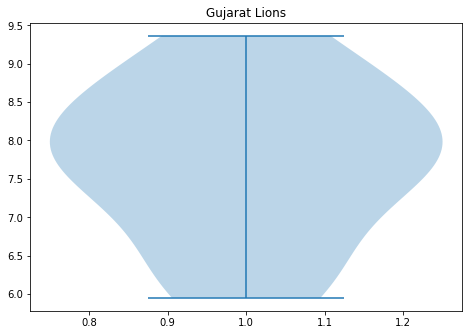

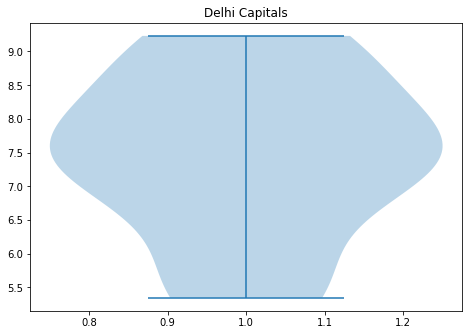

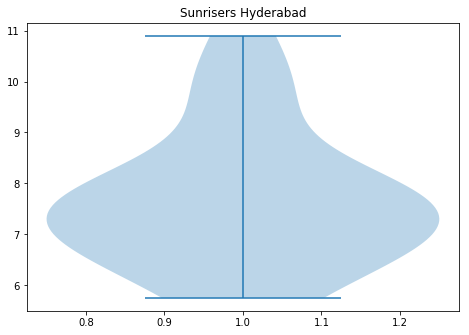

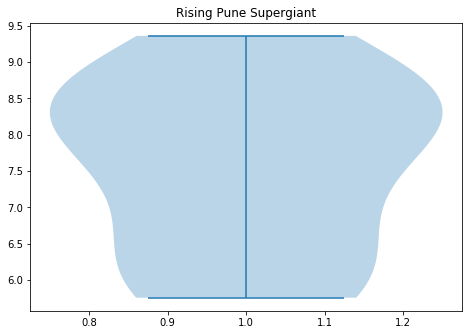

In [ ]:
over_indexed = []
under_indexed = []
for team in teams:
    team_match = matches[(matches['Team 1'] == team) | (matches['Team 2'] == team)]
    team_match = team_match[team_match['year']==2016]
    key = team_match['match_key'].to_numpy()
    runs = []
    run_rate = []
    for j in key:
        if j in str(season_2016['Match_id'].to_numpy()):
            run_rate.append(season_2016[season_2016['Match_id'].astype(str)==j]['run_rate'].to_numpy()[0])
            runs.append(season_2016[season_2016['Match_id'].astype(str)==j]['runs'].to_numpy()[0])
    team_match['runs'] = runs
#     print(runs)
    team_match['run_rate'] = run_rate
    team_match.head()
    mean = np.mean(run_rate)
    if mean > 6.0:
        over_indexed.append(team)
    else:
        under_indexed.append(team)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    bp = ax.violinplot(team_match['run_rate'])
    ax.set_title(team)
    plt.show()


In [ ]:
# team_match.head()

In [ ]:
# df.head()
# sns.violinplot(x='team', y="run_rate", data=df).set_xticklabels(df['team'].unique(), rotation=90)


In [ ]:
print("Over Indexed Teams ",over_indexed)
print()
print("Under Indexed Team ",under_indexed)

Over Indexed Teams  ['Mumbai Indians', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Gujarat Lions', 'Delhi Capitals', 'Sunrisers Hyderabad', 'Rising Pune Supergiant']

Under Indexed Team  []


### **Question 12**
* Calculate a metric **%fast_innings**. This would be percentage of innings where run_rate is more than base_line run rate of **6.0 per over**
    * Which team are top 3 teams by **%fast_innings**?
    * What insights do you have about the teams against %fast_innings?
* Let's now think of how **fast** or **slow** the run was made.
  * We will create a metric which would be an indicator of speed. Let's create a metric called **dist_base_line** which means **innings_run_rate - 6.0**.
  * A **negative** value would mean slow run_rate and **positive** would mean fast. The value would mean the **intensity**. (We can say a value of 3.6-6 = -2.4 means a very slow run rate. Which a value of 10.2-6 = 3.6 as a very fast run rate)
  * For a team (chose any of your choice), visualize the distribution of negative values and do the same for positive ones. 
  * Do you find skewness? If yes, how strong is it. Discuss the interesting cases.
* Are there instances where teams are making lots of runs at a very fast pace?
  * Create a **scatter-plot** with **runs_made** on x-axis and **run_rate** on y-axis. 
  * The **color** of the dots should correspond to the team color
  * Discuss the **insights** derived. Are there teams really dominating the run making?

---------------------------

In [ ]:
histogram.head()

,Match_id,runs,over,run_rate
0,2008041801,222,20.666667,10.741935
1,2008041802,82,16.833333,4.871287
2,2008041901,369,41.000000,9.000000
3,2008041902,339,36.833333,9.203620
4,2008042001,275,40.166667,6.846473


In [ ]:
histogram['Match_id'].unique()
#2009042303, 2009042304

array([2008041801, 2008041802, 2008041901, 2008041902, 2008042001,
       2008042002, 2008042101, 2008042102, 2008042201, 2008042202,
       2008042301, 2008042302, 2008042401, 2008042402, 2008042501,
       2008042502, 2008042601, 2008042602, 2008042701, 2008042702,
       2008042801, 2008042802, 2008042901, 2008042902, 2008043001,
       2008043002, 2008050101, 2008050102, 2008050201, 2008050202,
       2008050301, 2008050302, 2008050401, 2008050402, 2008050501,
       2008050502, 2008050601, 2008050602, 2008050701, 2008050702,
       2008050801, 2008050802, 2008050901, 2008050902, 2008051001,
       2008051002, 2008051101, 2008051102, 2008051201, 2008051202,
       2008051301, 2008051302, 2008051401, 2008051402, 2008051501,
       2008051502, 2008051601, 2008051602, 2008051701, 2008051702,
       2008051801, 2008051802, 2008051901, 2008051902, 2008052001,
       2008052002, 2008052101, 2008052102, 2008052301, 2008052302,
       2008052401, 2008052402, 2008052501, 2008052502, 2008052

In [ ]:
teams=list()
match = histogram.Match_id.astype(str).to_numpy()
sum = 0
for j in match:
    temp = matches[matches['match_key']== j]
    if temp.empty == False:
        if j[9:] == '1':
            teams.append(temp.iloc[0]['Team 1'])
        elif j[9:] =='2':
            teams.append(temp.iloc[0]['Team 2'])
        if j[9:] == '3':
            teams.append(temp.iloc[0]['Team 1'])
        elif j[9:] =='4':
            teams.append(temp.iloc[0]['Team 2'])
    elif temp.empty == True:
        teams.append('Team Unavailable')
    
histogram['teams'] = teams
histogram.head()

,Match_id,runs,over,run_rate,teams
0,2008041801,222,20.666667,10.741935,Royal Challengers Bangalore
1,2008041802,82,16.833333,4.871287,Team Unavailable
2,2008041901,369,41.000000,9.000000,Kings XI Punjab
3,2008041902,339,36.833333,9.203620,Rajasthan Royals
4,2008042001,275,40.166667,6.846473,Kolkata Knight Riders


In [ ]:
new_histogram = histogram[histogram['teams']!= 'Team Unavailable']
new_histogram.head()

,Match_id,runs,over,run_rate,teams
0,2008041801,222,20.666667,10.741935,Royal Challengers Bangalore
2,2008041901,369,41.000000,9.000000,Kings XI Punjab
3,2008041902,339,36.833333,9.203620,Rajasthan Royals
4,2008042001,275,40.166667,6.846473,Kolkata Knight Riders
5,2008042002,278,40.833333,6.808163,Royal Challengers Bangalore


In [ ]:
# new_histogram
total_innings = new_histogram.groupby(new_histogram['teams']).agg('count')
# total_innings

In [ ]:
new_histogram = new_histogram[new_histogram['run_rate']>6.0]
new_histogram.head()

,Match_id,runs,over,run_rate,teams
0,2008041801,222,20.666667,10.741935,Royal Challengers Bangalore
2,2008041901,369,41.000000,9.000000,Kings XI Punjab
3,2008041902,339,36.833333,9.203620,Rajasthan Royals
4,2008042001,275,40.166667,6.846473,Kolkata Knight Riders
5,2008042002,278,40.833333,6.808163,Royal Challengers Bangalore


In [ ]:
innings_with_6 = new_histogram.groupby(new_histogram['teams']).agg('count')
# innings_with_6

In [ ]:
percentage = innings_with_6['run_rate'].to_numpy()/total_innings['run_rate'].to_numpy()
percentage
innings_with_6['%fast_innings'] = percentage
innings_with_6.head()
innings_with_6.drop(columns=['Match_id','runs','run_rate','over'],axis=0,inplace=True)
innings_with_6

,%fast_innings
teams,
Chennai Super Kings,0.960000
Deccan Chargers,1.000000
Delhi Capitals,0.917808
Gujarat Lions,0.937500
Kings XI Punjab,0.960526
Kochi Tuskers Kerala,1.000000
Kolkata Knight Riders,0.944444
Mumbai Indians,0.909091
Pune Warriors,0.814815


In [ ]:
innings_with_6.sort_values(by = "%fast_innings",ascending=False).head(3)

,%fast_innings
teams,
Deccan Chargers,1.000000
Kochi Tuskers Kerala,1.000000
Rajasthan Royals,0.983607


In [ ]:
histogram['dist_base_line'] = histogram['run_rate'] - 6.0
# histogram.head()

In [ ]:
histogram[histogram['dist_base_line']<0].head()

,Match_id,runs,over,run_rate,teams,dist_base_line
1,2008041802,82,16.833333,4.871287,Team Unavailable,-1.128713
15,2008042502,116,21.000000,5.523810,Team Unavailable,-0.476190
56,2008051601,67,16.333333,4.102041,Mumbai Indians,-1.897959
81,2008053002,87,16.666667,5.220000,Team Unavailable,-0.780000
82,2008053101,112,20.333333,5.508197,Kings XI Punjab,-0.491803


In [ ]:
bangalore = histogram[histogram['teams']=='Royal Challengers Bangalore']
bangalore.head()

,Match_id,runs,over,run_rate,teams,dist_base_line
0,2008041801,222,20.666667,10.741935,Royal Challengers Bangalore,4.741935
5,2008042002,278,40.833333,6.808163,Royal Challengers Bangalore,0.808163
20,2008042801,178,20.500000,8.682927,Royal Challengers Bangalore,2.682927
30,2008050301,334,41.166667,8.113360,Royal Challengers Bangalore,2.113360
34,2008050501,126,20.166667,6.247934,Royal Challengers Bangalore,0.247934


1.0789372614984938

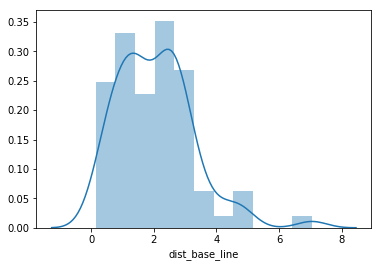

In [ ]:
bangalore_P = bangalore[bangalore['dist_base_line']>0]
bangalore_N = bangalore[bangalore['dist_base_line']<0]
sns.distplot(bangalore_P['dist_base_line'])

from scipy.stats import skew
skew(bangalore_P['dist_base_line'])
## More weight in the right tail of the distribution

0.07899539838436938

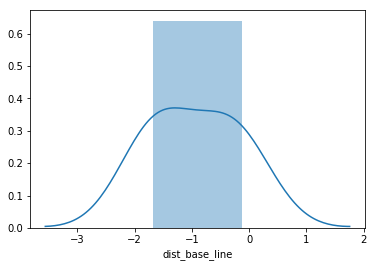

In [ ]:
sns.distplot(bangalore_N['dist_base_line'])
from scipy.stats import skew
skew(bangalore_N['dist_base_line'])
## Almost a normal distribution

In [ ]:
histogram.head()
plot = histogram[histogram['teams']!= 'Team Unavailable']

In [ ]:
plot.head()

,Match_id,runs,over,run_rate,teams,dist_base_line
0,2008041801,222,20.666667,10.741935,Royal Challengers Bangalore,4.741935
2,2008041901,369,41.000000,9.000000,Kings XI Punjab,3.000000
3,2008041902,339,36.833333,9.203620,Rajasthan Royals,3.203620
4,2008042001,275,40.166667,6.846473,Kolkata Knight Riders,0.846473
5,2008042002,278,40.833333,6.808163,Royal Challengers Bangalore,0.808163


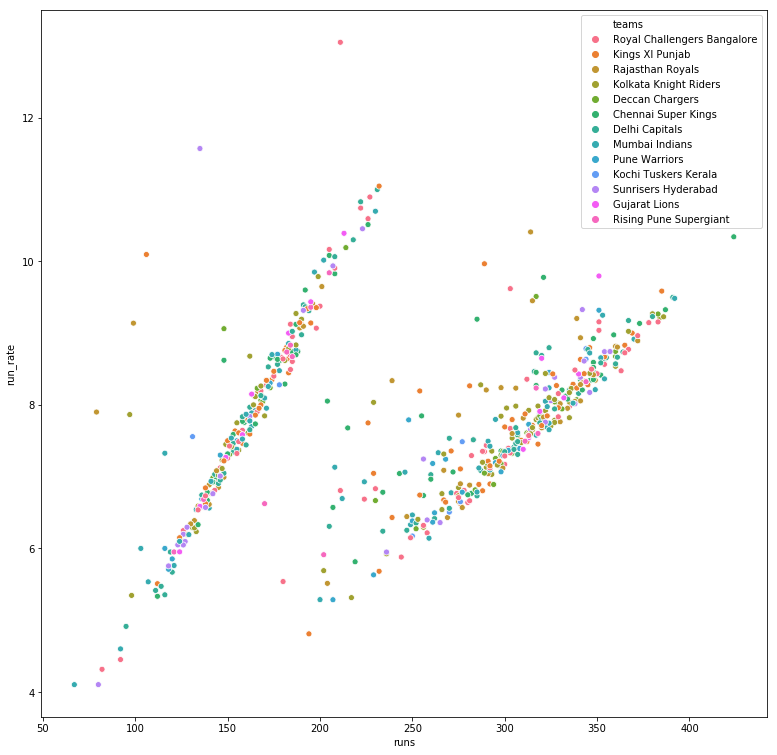

In [ ]:
plt.figure(figsize=(13,13))
sns.scatterplot(x="runs", y="run_rate", hue="teams", data=plot,legend='full')

### **Question 13**
* Let's analyze whether higher run_rate lead to victory?
* Create a visualization to analyze run_rates of teams in matches which it won against the ones it lost. (Hint : Box plots)
* Discuss your insights :
  * Is there a team which is really winning based on a higher run_rate maintained by them?
  * Think about a **statistical test of significance** which can help you evaluate the hypothesis mentioned in the 1st point.
    * **Reference 1 :** [Understanding the tests of significance](https://towardsdatascience.com/statistical-significance-hypothesis-testing-the-normal-curve-and-p-values-93274fa32687)
    * **Reference 2 :** [When to apply what?](https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740)
    * **Reference 3 :** [Understanding T-test](https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29)
  * **(Optional)**. Implement the test and explain your result

------------------

In [ ]:
match_run_rates = histogram 
match_run_rates.head()

,Match_id,runs,over,run_rate,teams,dist_base_line
0,2008041801,222,20.666667,10.741935,Royal Challengers Bangalore,4.741935
1,2008041802,82,16.833333,4.871287,Team Unavailable,-1.128713
2,2008041901,369,41.000000,9.000000,Kings XI Punjab,3.000000
3,2008041902,339,36.833333,9.203620,Rajasthan Royals,3.203620
4,2008042001,275,40.166667,6.846473,Kolkata Knight Riders,0.846473


In [ ]:
key = match_run_rates['Match_id'].to_numpy()
winner = []
for j in key:
    temp = matches[matches['match_key']== str(j)]
    if temp.empty == False:
        winner.append(temp.iloc[0]['Winner'])
    elif temp.empty == True:
        winner.append('Team Unavailable')
# print(winner)
match_run_rates['Winner'] = winner
# match_run_rates  
winner = []
for i in match_run_rates.index:
    if(match_run_rates['teams'][i] == match_run_rates['Winner'][i]):
        winner.append(1)
    else:
        winner.append(0)
match_run_rates['is_winner'] = winnerS
match_run_rates.head()

,Match_id,runs,over,run_rate,teams,dist_base_line,Winner,is_winner
0,2008041801,222,20.666667,10.741935,Royal Challengers Bangalore,4.741935,Kolkata Knight Riders,0
1,2008041802,82,16.833333,4.871287,Team Unavailable,-1.128713,Team Unavailable,1
2,2008041901,369,41.000000,9.000000,Kings XI Punjab,3.000000,Chennai Super Kings,0
3,2008041902,339,36.833333,9.203620,Rajasthan Royals,3.203620,Delhi Capitals,0
4,2008042001,275,40.166667,6.846473,Kolkata Knight Riders,0.846473,Kolkata Knight Riders,1


In [ ]:
match_run_rates = match_run_rates[match_run_rates['Winner']!='Team Unavailable']
match_run_rates.head()

,Match_id,runs,over,run_rate,teams,dist_base_line,Winner,is_winner
0,2008041801,222,20.666667,10.741935,Royal Challengers Bangalore,4.741935,Kolkata Knight Riders,0
2,2008041901,369,41.000000,9.000000,Kings XI Punjab,3.000000,Chennai Super Kings,0
3,2008041902,339,36.833333,9.203620,Rajasthan Royals,3.203620,Delhi Capitals,0
4,2008042001,275,40.166667,6.846473,Kolkata Knight Riders,0.846473,Kolkata Knight Riders,1
5,2008042002,278,40.833333,6.808163,Royal Challengers Bangalore,0.808163,Royal Challengers Bangalore,1


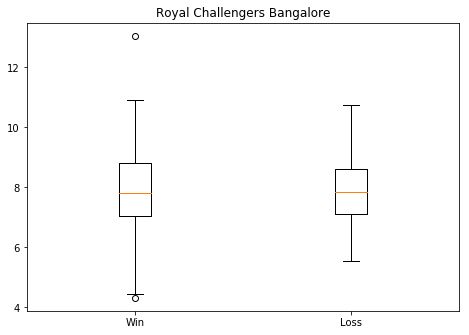

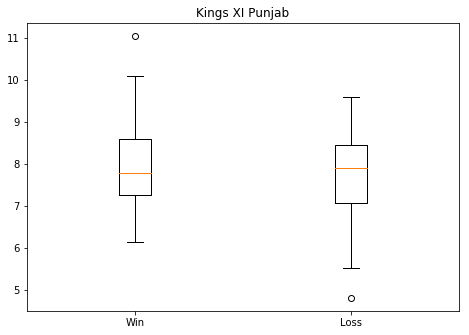

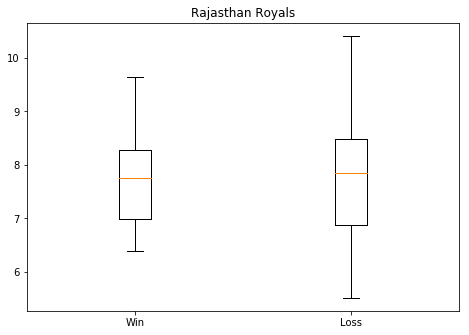

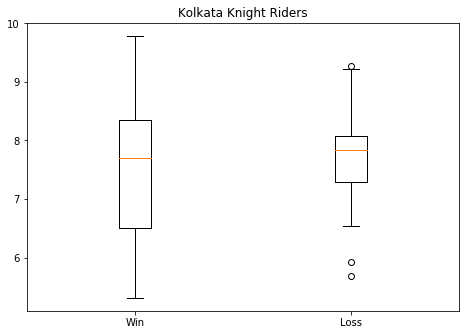

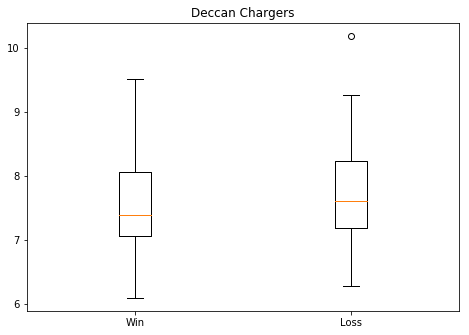

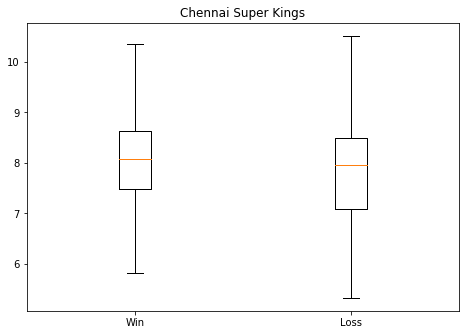

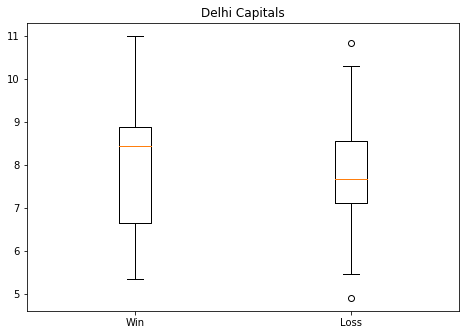

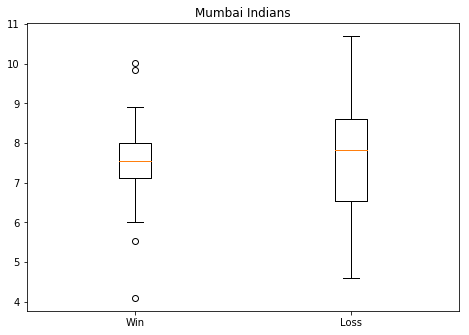

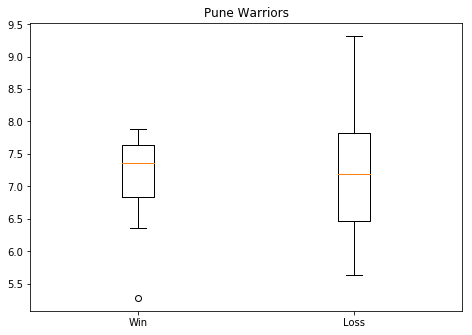

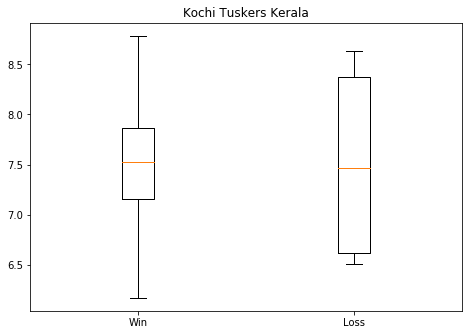

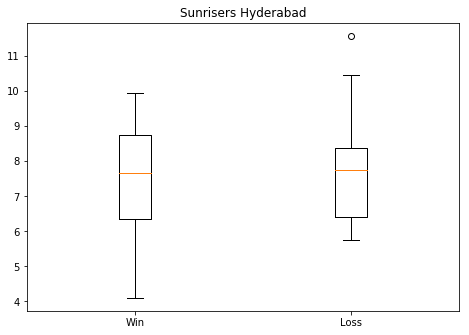

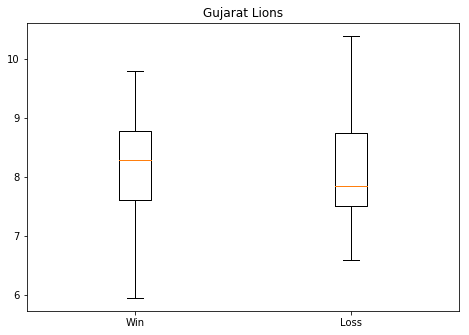

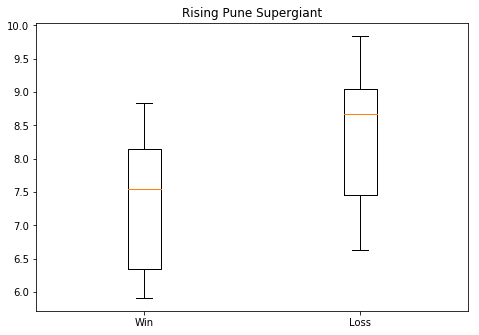

In [ ]:
for j in match_run_rates['teams'].unique():
    team = match_run_rates[match_run_rates['teams']==j]
    team_win = team[team['is_winner']==1]
    team_loss = team[team['is_winner']==0]
    data = [team_win['run_rate'],team_loss['run_rate']]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(j)
    bp = ax.boxplot(data)
    ax.set_xticklabels(labels=['Win','Loss'])
    plt.show()

### **Question 14**
* **Virat Kohli** is known to be a **master chaser**. Is it so? Let's validate through raw data
* Visualize the runs made by Virat Kohli in matches where his team played the **1st innings** (Hint : Use histograms)
* Visualize the runs made by Virat Kohli in matches where his team played the **2nd innings**. (Note : the 2 histograms should be plotted in the same figure)
* Interpret the histograms. Do they look cleanly **separated**?
* Create a **1X2** subplot : 
  * In subplot **(1,1)** plot the two histograms for the matches which his team won
  * In subplot **(1,2)** plot the two histograms for the matches which his team lost
  * **Discuss** your findings
    * Has Kohli been a great chaser **only** in matches won?
* Calculate Kohli's **run contribution(%)** for all matches played by him
  * Draw a violin plot of his **run_contribution(%)** for two categories : 
    * Matches **won** by his team
    * Matches **lost** by his team
  * Draw a **scatter plot** showing **run_contribution(%)** on **X-axis** and **strike_rate** on **y-axis**. Define **color** of dots as : 
    * **Green :** For matches won
    * **Red :** For matches lost
  * Discuss your insights. Do you think he has been playing captain's innings?


In [ ]:
deliveries.head()

,Match_id,Innings,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved
0,2016043001,1st innings,1,0.1,DA Warner,KW Richardson,S Dhawan,0,0,NaN,0,NaN,NaN,NaN
1,2016043001,1st innings,1,0.2,DA Warner,KW Richardson,S Dhawan,4,0,NaN,4,NaN,NaN,NaN
2,2016043001,1st innings,1,0.3,DA Warner,KW Richardson,S Dhawan,1,0,NaN,1,NaN,NaN,NaN
3,2016043001,1st innings,1,0.4,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN
4,2016043001,1st innings,1,0.5,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
# deliveries['Batsman'].unique()

In [ ]:
kohli = deliveries[deliveries['Batsman']=='V Kohli']

In [ ]:
kohli_first = kohli[kohli['Innings'] == '1st innings']
kohli_first.head()

,Match_id,Innings,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved
5490,2013042901,1st innings,5,4.2,V Kohli,JP Faulkner,A Mukund,0,0,NaN,0,NaN,NaN,NaN
5491,2013042901,1st innings,5,4.3,V Kohli,JP Faulkner,A Mukund,0,1,LEGBYES,1,NaN,NaN,NaN
5493,2013042901,1st innings,5,4.5,V Kohli,JP Faulkner,A Mukund,1,0,NaN,1,NaN,NaN,NaN
5496,2013042901,1st innings,6,5.1,V Kohli,SR Watson,A Mukund,0,0,NaN,0,NaN,NaN,NaN
5497,2013042901,1st innings,6,5.2,V Kohli,SR Watson,A Mukund,1,0,NaN,1,NaN,NaN,NaN


In [ ]:
kohli_first_runs = kohli_first.groupby(kohli_first['Match_id']).agg('sum')
# kohli_first_runs.reset_index()

In [ ]:
kohli_second = kohli[kohli['Innings'] == '2nd innings']
# kohli_second.head()

In [ ]:
kohli_second_runs = kohli_second.groupby(kohli_second['Match_id']).agg('sum')
kohli_second_runs.head()

,Over,Delivery,runs_batsman,runs_extras,Runs_total
Match_id,,,,,
2008041802,12,8.2,1,4,5
2008042002,188,177.8,23,1,24
2008042802,116,111.8,12,0,12
2008043002,20,19.3,1,0,1
2008051702,16,10.7,3,1,4


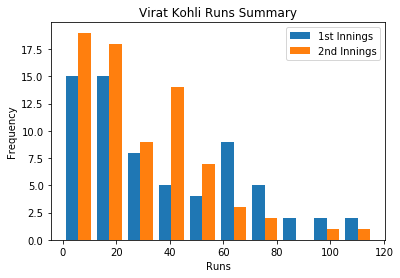

In [ ]:
first = kohli_first_runs['Runs_total']
legend = ['1st Innings', '2nd Innings']
second = kohli_second_runs['Runs_total']
plt.hist([first, second])
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Virat Kohli Runs Summary')
plt.show()

## Histograms are cleanly separated

In [ ]:
kohli_first_runs = kohli_first_runs.reset_index()
# kohli_second_runs = kohli_second_runs.reset_index()
kohli_second_runs.head()

,Over,Delivery,runs_batsman,runs_extras,Runs_total
Match_id,,,,,
2008041802,12,8.2,1,4,5
2008042002,188,177.8,23,1,24
2008042802,116,111.8,12,0,12
2008043002,20,19.3,1,0,1
2008051702,16,10.7,3,1,4


In [ ]:
kohli_second_runs = kohli_second_runs.reset_index()
kohli_second_runs.head()

,Match_id,Over,Delivery,runs_batsman,runs_extras,Runs_total
0,2008041802,12,8.2,1,4,5
1,2008042002,188,177.8,23,1,24
2,2008042802,116,111.8,12,0,12
3,2008043002,20,19.3,1,0,1
4,2008051702,16,10.7,3,1,4


In [ ]:
winner = []
count = 0
for j in kohli_first_runs['Match_id'].to_numpy():
    temp = matches[matches['match_key'] == str(j)]
#     print(temp)
    count = count + 1
    l = list(temp['Winner'])
    if l:
        if(l[0]=='Royal Challengers Bangalore'):
            winner.append(1)
        else:
            winner.append(0)
    else:
        winner.append(0)
# print(count)
# print(len(kohli_second_runs))
kohli_first_runs['win'] = winner
kohli_first_runs.head()  

,Match_id,Over,Delivery,runs_batsman,runs_extras,Runs_total,win
0,2008042601,134,124.6,13,2,15,0
1,2008050301,268,248.2,38,2,40,1
2,2008050501,254,227.2,34,4,38,0
3,2008051201,75,59.9,21,5,26,0
4,2008052101,99,88.5,10,2,12,0


In [ ]:
winner = []
count = 0
for j in kohli_second_runs['Match_id'].to_numpy():
    temp = matches[matches['match_key'] == str(j)]
#     print(temp)
    count = count + 1
    l = list(temp['Winner'])
    if l:
        if(l[0]=='Royal Challengers Bangalore'):
            winner.append(1)
        else:
            winner.append(0)
    else:
        winner.append(0)
# print(count)
# print(len(kohli_second_runs))
kohli_second_runs['win'] = winner
kohli_second_runs.head()  

,Match_id,Over,Delivery,runs_batsman,runs_extras,Runs_total,win
0,2008041802,12,8.2,1,4,5,0
1,2008042002,188,177.8,23,1,24,1
2,2008042802,116,111.8,12,0,12,0
3,2008043002,20,19.3,1,0,1,0
4,2008051702,16,10.7,3,1,4,0


In [ ]:
kohli_first_wins = kohli_first_runs[kohli_first_runs['win']==1]
# kohli_first_wins.head()

In [ ]:
kohli_first_loss = kohli_first_runs[kohli_first_runs['win']==0]

In [ ]:
kohli_second_wins = kohli_second_runs[kohli_second_runs['win']==1]

In [ ]:
kohli_second_loss = kohli_second_runs[kohli_second_runs['win']==0]

Text(0.5, 1.0, 'Kohli Lost Summary')

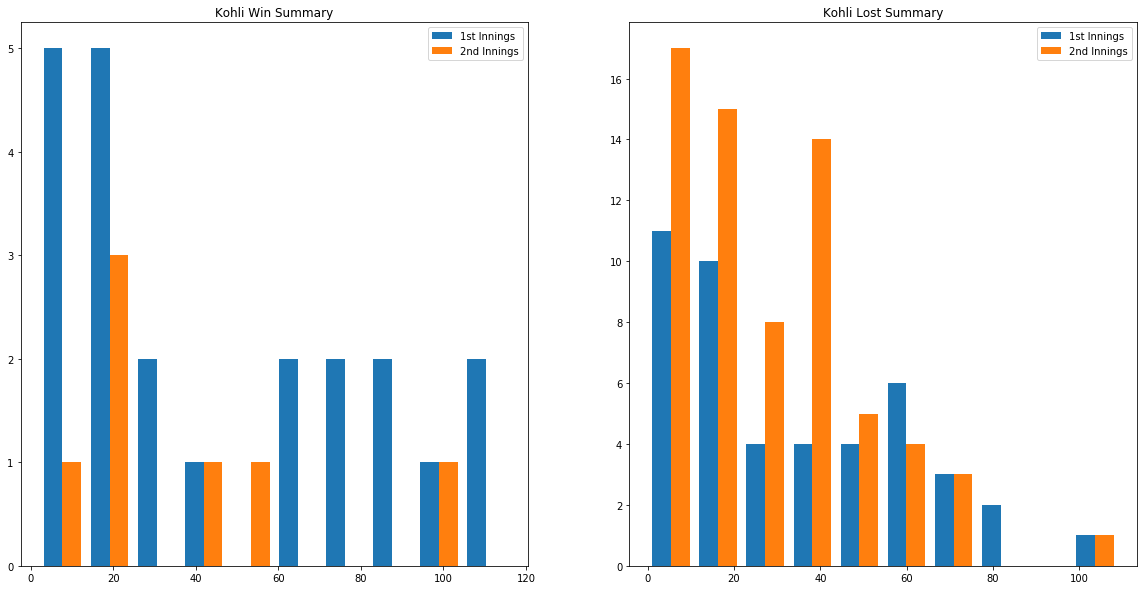

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
first = kohli_first_wins['Runs_total']
legend = ['1st Innings', '2nd Innings']
second = kohli_second_wins['Runs_total']
ax1.hist([first, second])
ax1.legend(legend)
ax1.set_title('Kohli Win Summary')
first = kohli_first_loss['Runs_total']
legend = ['1st Innings', '2nd Innings']
second = kohli_second_loss['Runs_total']
ax2.hist([first, second])
ax2.legend(legend)
ax2.set_title('Kohli Lost Summary')

## Great Chaser Overall

In [ ]:
runs = deliveries.groupby(deliveries['Match_id']).sum()
runs = runs.reset_index()

In [ ]:
t = []
for j in kohli_first_runs.Match_id.to_numpy():
    temp = runs[runs['Match_id']==j]
    t.append(list(temp['Runs_total'])[0])
kohli_first_runs['team total'] = t
# kohli_first_runs.head()

In [ ]:
t = []
for j in kohli_second_runs.Match_id.to_numpy():
    temp = runs[runs['Match_id']==j]
    t.append(list(temp['Runs_total'])[0])
kohli_second_runs['team total'] = t
# kohli_second_runs.head()

In [ ]:
kohli_first_runs['kohli contribution'] = (kohli_first_runs['Runs_total'] / kohli_first_runs['team total'])*100
kohli_second_runs['kohli contribution'] = (kohli_second_runs['Runs_total'] / kohli_second_runs['team total'])*100

In [ ]:
kohli_first_runs.head()

,Match_id,Over,Delivery,runs_batsman,runs_extras,Runs_total,win,team total,kohli contribution
0,2008042601,134,124.6,13,2,15,0,282,5.319149
1,2008050301,268,248.2,38,2,40,1,334,11.976048
2,2008050501,254,227.2,34,4,38,0,126,30.158730
3,2008051201,75,59.9,21,5,26,0,143,18.181818
4,2008052101,99,88.5,10,2,12,0,315,3.809524


In [ ]:
kohli_wins = pd.concat([kohli_first_runs[kohli_first_runs['win'] == 1],kohli_second_runs[kohli_second_runs['win'] == 1]])
# kohli_wins
kohli_loss = pd.concat([kohli_first_runs[kohli_first_runs['win'] == 0],kohli_second_runs[kohli_second_runs['win'] == 0]])

Text(0.5, 1.0, 'Run contribution in LOSS')

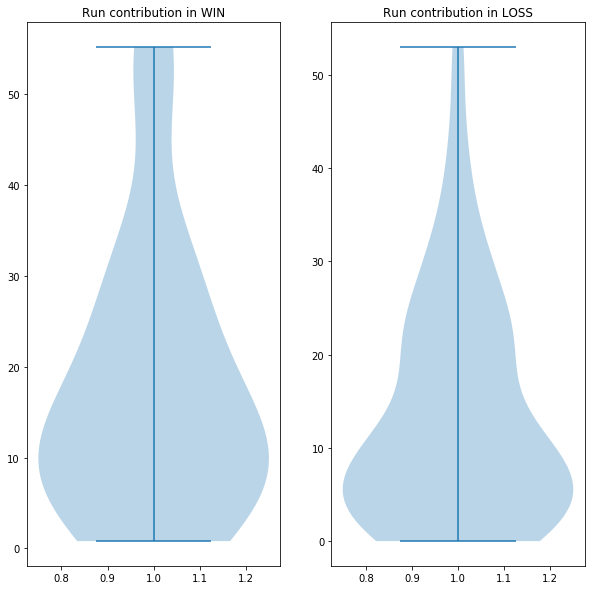

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))
ax1.violinplot(kohli_wins['kohli contribution'])
ax1.set_title("Run contribution in WIN")
ax2.violinplot(kohli_loss['kohli contribution'])
ax2.set_title("Run contribution in LOSS")

In [ ]:
kohli_first_runs['Balls'] = kohli_first.groupby(kohli_first['Match_id']).agg('count')['Over'].to_numpy()[0]
kohli_second_runs['Balls'] = kohli_second.groupby(kohli_second['Match_id']).agg('count')['Over'].to_numpy()[0]

In [ ]:
kohli_first_runs['SR'] = (kohli_first_runs['Runs_total']/kohli_first_runs['Balls'])*100
kohli_second_runs['SR'] = (kohli_second_runs['Runs_total']/kohli_second_runs['Balls'])*100

In [ ]:
kohli = pd.concat([kohli_first_runs,kohli_second_runs])

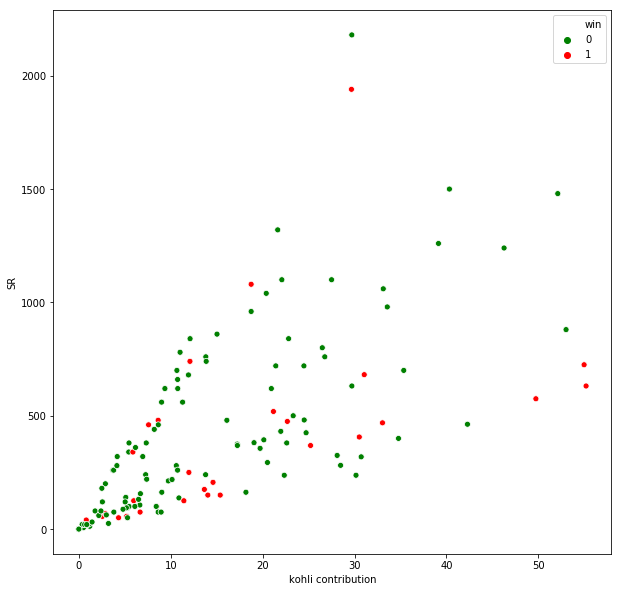

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x="kohli contribution", y="SR", hue="win", data=kohli ,palette=['green','red'], legend='full')

## Kohli had a varying contribution to the team win

#### Kohli has contributed to the winning of the team most of the times

### **Question 15**
* Consider you are part of **team selection committee** for your team
* You are required to suggest **best nominations** for selection of **batsmen** during the team auctions
* Your team owner wants a **good mix** of batsmen who can exhibit the below **traits** :
  * Aggression
  * Consistency
  * Can hit at will
  * Pinch hitters
  * Sheet Anchors
  * Match finishers
* Use the data provided to you to create an exhaustive **list of metrics** which can demonstrate **quality** of a given batsman
* Apply **suitable machine learning** techniques to generate **clusters** of batsmen
* **Analyze** the clusters for **batting traits** and name them suitably
* **Discuss** your outcomes 

In [ ]:
deliveries.head()

,Match_id,Innings,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved
0,2016043001,1st innings,1,0.1,DA Warner,KW Richardson,S Dhawan,0,0,NaN,0,NaN,NaN,NaN
1,2016043001,1st innings,1,0.2,DA Warner,KW Richardson,S Dhawan,4,0,NaN,4,NaN,NaN,NaN
2,2016043001,1st innings,1,0.3,DA Warner,KW Richardson,S Dhawan,1,0,NaN,1,NaN,NaN,NaN
3,2016043001,1st innings,1,0.4,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN
4,2016043001,1st innings,1,0.5,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
batsman_dataset = pd.DataFrame()

In [ ]:
batsman = deliveries['Batsman'].unique()

In [ ]:
# batsman

In [ ]:
runs_made = deliveries.groupby(deliveries['Batsman']).agg('sum')
runs_made.head()

,Match_id,Over,Delivery,runs_batsman,runs_extras,Runs_total
Batsman,,,,,,
A Ashish Reddy,394708639277,3312,3188.0,280,8,288
A Chandila,14090303807,132,127.3,4,0,4
A Chopra,150623656878,467,419.3,53,5,58
A Choudhary,40340896428,371,358.1,25,0,25
A Flintoff,114515394500,670,633.3,62,10,72


In [ ]:
balls_faced = deliveries.groupby(deliveries['Batsman']).agg('count')

In [ ]:
batsman_dataset['Batsman'] = batsman

In [ ]:
batting_info = batting.groupby(batting['batsmen']).agg('sum')

In [ ]:
some_data.head()

,batsmen,R,fours,sixes,is_fielder_involved,100s,50s,times_played,average,points
0,A Ashish Reddy,280.0,17.0,14.0,8,0.0,0.0,23,12.173913,100.0
1,A Chandila,4.0,0.0,0.0,0,0.0,0.0,2,2.000000,10.0
2,A Chopra,53.0,7.0,0.0,3,0.0,0.0,6,8.833333,24.0
3,A Choudhary,25.0,1.0,1.0,1,0.0,0.0,3,8.333333,16.0
4,A Dananjaya,4.0,0.0,0.0,0,0.0,0.0,1,4.000000,10.0


In [ ]:
batting_info.head()

,R,B,M,fours,sixes,SR,is_fielder_involved,boundary_contribution,fielder_involved,100s,50s,times_played
batsmen,,,,,,,,,,,,
A Ashish Reddy,280.0,193.0,262.0,17.0,14.0,3163.89,8,2.175375,8,0.0,0.0,0.0
A Chandila,4.0,7.0,16.0,0.0,0.0,66.66,0,0.000000,0,0.0,0.0,0.0
A Chopra,53.0,71.0,0.0,7.0,0.0,370.36,3,0.460664,3,0.0,0.0,0.0
A Choudhary,25.0,20.0,30.0,1.0,1.0,491.66,1,0.233333,1,0.0,0.0,0.0
A Dananjaya,4.0,5.0,0.0,0.0,0.0,80.00,0,0.000000,0,0.0,0.0,0.0


In [ ]:
batting_info['average'] = some_data['average'].to_numpy()

In [ ]:
batting_info.head()

,R,B,M,fours,sixes,SR,is_fielder_involved,boundary_contribution,fielder_involved,100s,50s,times_played,average
batsmen,,,,,,,,,,,,,
A Ashish Reddy,280.0,193.0,262.0,17.0,14.0,3163.89,8,2.175375,8,0.0,0.0,0.0,12.173913
A Chandila,4.0,7.0,16.0,0.0,0.0,66.66,0,0.000000,0,0.0,0.0,0.0,2.000000
A Chopra,53.0,71.0,0.0,7.0,0.0,370.36,3,0.460664,3,0.0,0.0,0.0,8.833333
A Choudhary,25.0,20.0,30.0,1.0,1.0,491.66,1,0.233333,1,0.0,0.0,0.0,8.333333
A Dananjaya,4.0,5.0,0.0,0.0,0.0,80.00,0,0.000000,0,0.0,0.0,0.0,4.000000


In [ ]:
batting_info.drop(columns=['is_fielder_involved','fielder_involved'],inplace=True)

In [ ]:
# batting_info.head()

In [ ]:
batting_info['times_played'] = some_data['times_played'].to_numpy()

In [ ]:
batting_info = batting_info.reset_index()

In [ ]:
batting_info.head()

,batsmen,R,B,M,fours,sixes,SR,boundary_contribution,100s,50s,times_played,average
0,A Ashish Reddy,280.0,193.0,262.0,17.0,14.0,3163.89,2.175375,0.0,0.0,23,12.173913
1,A Chandila,4.0,7.0,16.0,0.0,0.0,66.66,0.000000,0.0,0.0,2,2.000000
2,A Chopra,53.0,71.0,0.0,7.0,0.0,370.36,0.460664,0.0,0.0,6,8.833333
3,A Choudhary,25.0,20.0,30.0,1.0,1.0,491.66,0.233333,0.0,0.0,3,8.333333
4,A Dananjaya,4.0,5.0,0.0,0.0,0.0,80.00,0.000000,0.0,0.0,1,4.000000


In [ ]:
first_five_overs = deliveries[deliveries['Over'] <= 5]
last_five_overs = deliveries[deliveries['Over'] >= 15]

In [ ]:
first_five_overs = first_five_overs.groupby(first_five_overs['Batsman']).sum().reset_index()
last_five_overs = last_five_overs.groupby(last_five_overs['Batsman']).sum().reset_index()

In [ ]:
first_five_overs.head()

,Batsman,Match_id,Over,Delivery,runs_batsman,runs_extras,Runs_total
0,A Ashish Reddy,4026100804,10,9.1,0,0,0
1,A Chopra,64257638932,86,64.5,18,1,19
2,A Flintoff,22099459822,51,43.8,14,1,15
3,A Mishra,2013042501,5,4.6,0,0,0
4,A Mukund,26169557713,46,37.9,10,1,11


In [ ]:
temp = []
for i in batting_info['batsmen'].to_numpy():
    j = first_five_overs[first_five_overs['Batsman']==i]
    if j.empty == False:
        temp.append(j.iloc[0]['Runs_total'])
    else:
        temp.append(0)
batting_info['first_five_over_runs'] = temp

In [ ]:
# batting_info

In [ ]:
temp = []
for i in batting_info['batsmen'].to_numpy():
    j = last_five_overs[last_five_overs['Batsman']==i]
    if j.empty == False:
        temp.append(j.iloc[0]['Runs_total'])
    else:
        temp.append(0)
    
batting_info['last_five_over_runs'] = temp

In [ ]:
batting_info.head()
batting_info.to_csv("Batsman_info.csv")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
columns = ['fours', 'sixes', '100s', '50s', 'SR','R', 'B', 'average', 'first_five_over_runs', 'last_five_over_runs','times_played','boundary_contribution']

In [ ]:
for col in columns:
    batting_info[col] = StandardScaler().fit_transform(np.array(batting_info[col]).reshape(-1,1))

In [ ]:
batting_info.head()

,batsmen,R,B,M,fours,sixes,SR,boundary_contribution,100s,50s,times_played,average,first_five_over_runs,last_five_over_runs
0,A Ashish Reddy,-0.167921,-0.214071,262.0,-0.265018,-0.049241,0.190184,0.037326,-0.211263,-0.368453,0.021237,0.081599,-0.346444,0.515042
1,A Chandila,-0.482167,-0.494398,16.0,-0.467759,-0.442516,-0.592011,-0.566183,-0.211263,-0.368453,-0.606526,-1.050975,-0.346444,-0.463412
2,A Chopra,-0.426377,-0.397941,0.0,-0.384278,-0.442516,-0.515312,-0.438382,-0.211263,-0.368453,-0.486952,-0.290279,-0.273854,-0.471367
3,A Choudhary,-0.458257,-0.474805,30.0,-0.455833,-0.414425,-0.484679,-0.501449,-0.211263,-0.368453,-0.576633,-0.345940,-0.346444,-0.379885
4,A Dananjaya,-0.482167,-0.497412,0.0,-0.467759,-0.442516,-0.588642,-0.566183,-0.211263,-0.368453,-0.636420,-0.828332,-0.346444,-0.479321


In [ ]:
X = batting_info[columns]
# X.head()

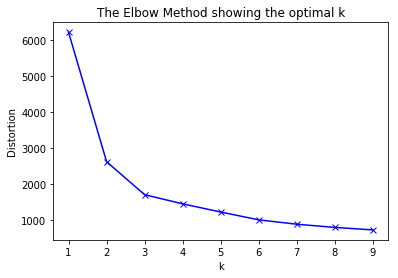

In [ ]:
from sklearn import metrics
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
model = KMeans(n_clusters=8, random_state=42, init='k-means++')
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
pred = model.predict(X)

In [ ]:
# pred

In [ ]:
X['cluster'] = pred

C:\Users\shlok\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X.head()

,fours,sixes,100s,50s,SR,R,B,average,first_five_over_runs,last_five_over_runs,times_played,boundary_contribution,cluster
0,-0.265018,-0.049241,-0.211263,-0.368453,0.190184,-0.167921,-0.214071,0.081599,-0.346444,0.515042,0.021237,0.037326,7
1,-0.467759,-0.442516,-0.211263,-0.368453,-0.592011,-0.482167,-0.494398,-1.050975,-0.346444,-0.463412,-0.606526,-0.566183,0
2,-0.384278,-0.442516,-0.211263,-0.368453,-0.515312,-0.426377,-0.397941,-0.290279,-0.273854,-0.471367,-0.486952,-0.438382,0
3,-0.455833,-0.414425,-0.211263,-0.368453,-0.484679,-0.458257,-0.474805,-0.345940,-0.346444,-0.379885,-0.576633,-0.501449,0
4,-0.467759,-0.442516,-0.211263,-0.368453,-0.588642,-0.482167,-0.497412,-0.828332,-0.346444,-0.479321,-0.636420,-0.566183,0


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
p = pca.fit_transform(X[columns])
p

array([[-0.24122357,  0.65931982],
       [-1.73435721, -0.06028349],
       [-1.37549051, -0.20011277],
       ...,
       [-1.72249033, -0.10554699],
       [ 8.23457199,  3.74022618],
       [-0.8732364 ,  0.50965344]])

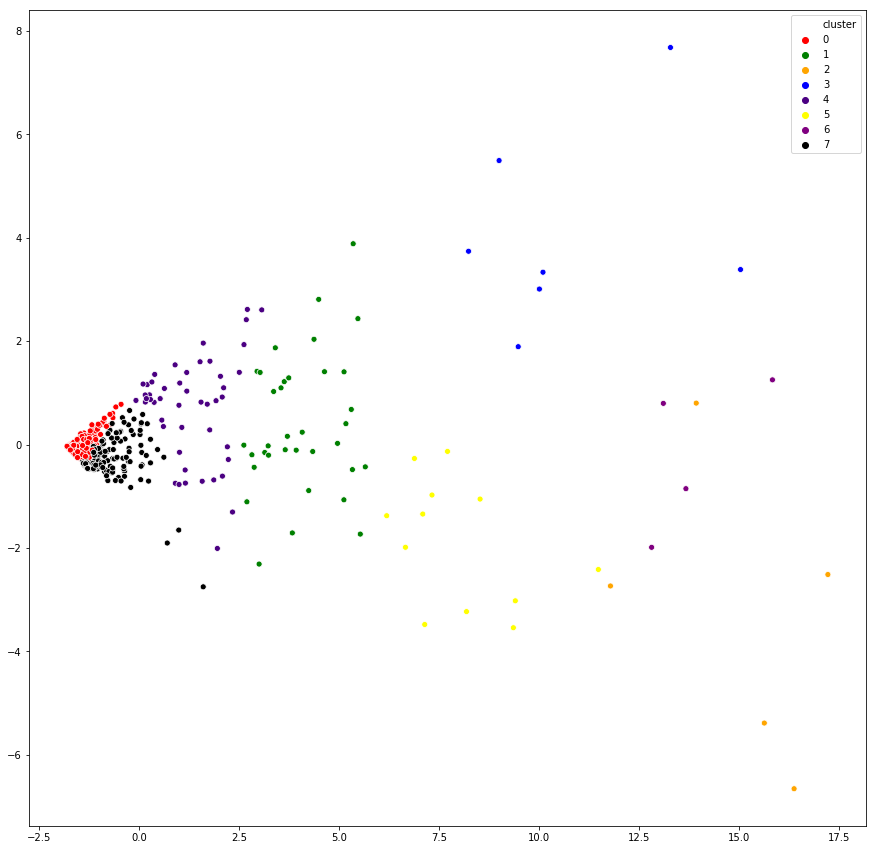

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=p[:,0], y=p[:,1], hue=X['cluster'],data=X,legend='full',palette=['red','green','orange','blue','indigo','yellow','purple','black'])

The clusters green, yellow, purple, blue, indigo and orange denote good and avergae batsman.There are some outliers for orange cluster and blue as well.